In [1]:
import cv2 as cv
import glob
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import pearsonr
import statistics

In [4]:
path = "/home/schnablelab/Documents/ImageDataset/RGB_satellite/MOValley/Hybrids/TP2/"
TP="TP2"
print(path) 
def RGB(path):
    all_files=glob.glob(os.path.join(path, '*.PNG'))
    Color=[]
    for files in all_files:
        print
        img=cv.imread(files)
        # img=img[1:20,1:11] ##For Satellite Crawfordsville
        # img=img[1:11, 1:20] ##MOValley
        # print(img.shape)
        plt.imshow(img)
        img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
        R=[]
        G=[]
        B=[]
        h=img.shape[0]
        w=img.shape[1]
        for height in range(h):
            for width in range(w):
                r,g,b = img[height, width]
                # print(r,g,b)
                R.append(r)
                G.append(g)
                B.append(b)
                
        Bsum_without_zeros = sum([x for x in B if x != 0])
        # Calculate the length excluding zeros
        Blength_without_zeros = len([x for x in B if x != 0])
        # Calculate the average excluding zeros
        AverageB=Bsum_without_zeros/Blength_without_zeros
        
        Rsum_without_zeros = sum([x for x in R if x != 0])
        # Calculate the length excluding zeros
        Rlength_without_zeros = len([x for x in R if x != 0])
        # Calculate the average excluding zeros
        AverageR=Rsum_without_zeros/Rlength_without_zeros
        
        Gsum_without_zeros = sum([x for x in G if x != 0])
        
        Glength_without_zeros = len([x for x in G if x != 0])
        # Calculate the average excluding zeros
        AverageG=Gsum_without_zeros/Glength_without_zeros
        
        
        # AverageB=sum(B)/len(B)
        # AverageG=sum(G)/len(G)
        # AverageR=sum(R)/len(R)
        Image=os.path.basename(files).split('.')[0]

        Color.append(
            {'file':Image,
             'Red':AverageR,
             'Green':AverageG,
             'Blue':AverageB
            }
        )
    RGB_values=pd.DataFrame(Color)
    return RGB_values

/home/schnablelab/Documents/ImageDataset/RGB_satellite/MOValley/Hybrids/TP2/


In [2]:
path = "/home/schnablelab/Documents/ImageDataset/RGB_satellite/Crawfordsville/Hybrids/TP1/"
TP="TP2"
print(path) 
def RGB(path):
    all_files=glob.glob(os.path.join(path, '*.PNG'))
    Color=[]
    for files in all_files:
        print
        img=cv.imread(files)
        img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
        R=[]
        G=[]
        B=[]
        h=img.shape[0]
        w=img.shape[1]
        Image=os.path.basename(files).split('.')[0]
        for height in range(h):
            # print(height)
            for width in range(w):
                # print(height, width)
                r,g,b = img[height, width]
                GLI=(2*g-r-b)/(2*g+r+b)
                
                NGRDIupper=g.astype(float)-r.astype(float)
                NGRDIlower=g.astype(float)+r.astype(float)
                NGRDI=(NGRDIupper.astype(float)/NGRDIlower.astype(float))
                # print(r,g,b,GLI,NGRDI)
#                 print(type(r),type(g),type(b),type(GLI),type(NGRDI))
            

                Color.append(
                    {'file':Image,
                     'Red':r,
                     'Green':g,
                     'Blue':b,
                     'GLI':GLI,
                     'NGRDI':NGRDI
                    }
                )
    RGB_values=pd.DataFrame(Color)
    return RGB_values

/home/schnablelab/Documents/ImageDataset/RGB_satellite/Crawfordsville/Hybrids/TP1/


In [3]:
RGBvalues_satellite=RGB('/home/schnablelab/Documents/ImageDataset/RGB_satellite/Crawfordsville/Hybrids/TP1/')
RGBvalues_satellite=RGBvalues_satellite.loc[RGBvalues_satellite['Red']>=0.001]
RGBvalues_satellite=RGBvalues_satellite.groupby('file')[["Red", "Green", "Blue", 'GLI', 'NGRDI']].agg(['mean', 'median', 'sum']).reset_index()
RGBvalues_satellite.columns = RGBvalues_satellite.columns.map('_'.join)
# RGBvalues_satellite.columns=[['file','RedMean', 'RedMedian', 'RedSum','GreenMean','GreenMedian', 'GreenSum', 'BlueMean', 'BlueMedian', 'BlueSum', 'GLIMean', 'GLIMedian', 'GLIsum', 'NGRDIMean', 'NGRDIMedian', 'NGRDISum']]

/tmp/ipykernel_8293/2285734038.py:22: RuntimeWarning: invalid value encountered in scalar divide
  GLI=(2*g-r-b)/(2*g+r+b)
/tmp/ipykernel_8293/2285734038.py:26: RuntimeWarning: invalid value encountered in scalar divide
  NGRDI=(NGRDIupper.astype(float)/NGRDIlower.astype(float))


In [4]:
RGBvalues_satellite.describe()

,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
count,522.000000,522.000000,522.00000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,66.542779,67.910920,13748.39272,85.497355,86.530651,17664.994253,75.090923,76.091954,15515.308429,0.099183,0.091694,20.495971,0.138133,0.120547,28.551837
std,4.609365,4.041675,1055.20662,4.577594,4.463654,1108.682910,3.977410,3.412770,979.112712,0.010160,0.009515,2.239266,0.013492,0.012118,3.055145
min,55.504762,59.000000,11539.00000,74.042857,76.000000,15102.000000,66.158590,67.000000,13468.000000,0.016191,0.000000,3.238103,0.066359,0.000000,13.271752
25%,63.966765,65.000000,13114.25000,82.405152,83.000000,16935.000000,73.021325,74.000000,14944.250000,0.093813,0.086361,19.259184,0.130932,0.115646,26.774361
50%,66.280000,68.000000,13671.50000,85.550000,86.000000,17622.500000,74.906538,76.000000,15446.500000,0.099648,0.092105,20.516656,0.138962,0.122455,28.557874
75%,68.675121,70.000000,14248.50000,88.247627,89.000000,18301.500000,76.920427,79.000000,15985.750000,0.104846,0.096985,21.758610,0.145514,0.127483,30.309682
max,113.009091,86.500000,24862.00000,121.109091,99.000000,26644.000000,122.027273,97.500000,26846.000000,0.128187,0.121504,27.688393,0.218397,0.146667,45.863324


In [5]:
RGBvalues_satellite

,file_,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
0,Crawfordsville-TP1-4351_10_13,64.734597,65.0,13659,84.597156,83.0,17850,74.417062,74.0,15702,0.099698,0.095385,21.036196,0.138170,0.128571,29.153957
1,Crawfordsville-TP1-4351_10_14,60.750000,61.0,12150,78.180000,79.0,15636,70.290000,70.0,14058,0.092008,0.087108,18.401511,0.135214,0.122302,27.042864
2,Crawfordsville-TP1-4351_10_15,69.085000,70.0,13817,85.180000,86.0,17036,76.010000,77.0,15202,0.082875,0.075529,16.574970,0.110195,0.098765,22.038992
3,Crawfordsville-TP1-4351_10_16,63.560748,64.5,13602,82.056075,83.0,17560,73.439252,74.0,15716,0.096457,0.086177,20.641894,0.143012,0.123288,30.604612
4,Crawfordsville-TP1-4351_10_17,60.149038,62.0,12511,78.014423,79.0,16227,68.778846,70.0,14306,0.100213,0.093333,20.844271,0.146552,0.122302,30.482726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Crawfordsville-TP1-4353_9_42,71.093897,73.0,15143,93.079812,95.0,19826,80.558685,83.0,17159,0.109375,0.099150,23.296934,0.151249,0.130952,32.216093
518,Crawfordsville-TP1-4353_9_43,70.059908,71.0,15203,89.953917,91.0,19520,80.142857,82.0,17391,0.092394,0.088757,20.049486,0.130914,0.124183,28.408270
519,Crawfordsville-TP1-4353_9_44,69.632353,72.0,14205,90.107843,91.0,18382,78.156863,80.0,15944,0.103753,0.095385,21.165609,0.139778,0.123457,28.514735
520,Crawfordsville-TP1-4353_9_45,67.035000,68.0,13407,86.925000,88.0,17385,75.845000,76.0,15169,0.102997,0.095968,20.599440,0.143856,0.126761,28.771255


In [6]:
RGBvalues_satellite.to_csv("RGBvalues_satellite.csv", index=False)

(array([ 45., 254., 195.,  25.,   0.,   1.,   0.,   0.,   1.,   1.]),
 array([ 55.5047619 ,  61.25519481,  67.00562771,  72.75606061,
         78.50649351,  84.25692641,  90.00735931,  95.75779221,
        101.50822511, 107.25865801, 113.00909091]),
 <BarContainer object of 10 artists>)

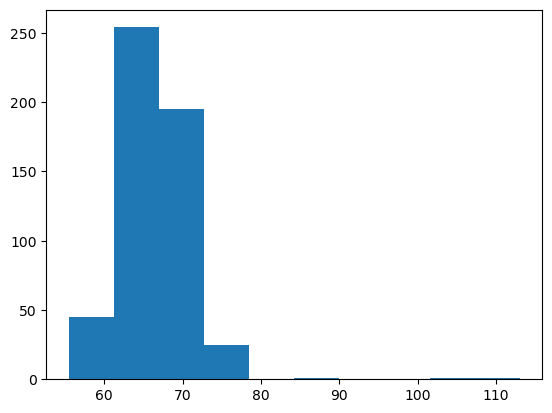

In [6]:
plt.hist(RGBvalues_satellite['Red_mean'])

In [7]:
RGBvalues_uav=RGB('/home/schnablelab/Documents/ImageDataset/RGB_UAV/Crawfordsville/Hybrids/TP1/')

/tmp/ipykernel_8293/2285734038.py:22: RuntimeWarning: invalid value encountered in scalar divide
  GLI=(2*g-r-b)/(2*g+r+b)
/tmp/ipykernel_8293/2285734038.py:26: RuntimeWarning: invalid value encountered in scalar divide
  NGRDI=(NGRDIupper.astype(float)/NGRDIlower.astype(float))


In [13]:
RGBvalues_uav.describe()

,Red,Green,Blue,GLI,NGRDI
count,1.417255e+08,1.417255e+08,1.417255e+08,1.364107e+08,1.363779e+08
mean,8.077613e+01,1.169595e+02,7.334873e+01,2.216635e-01,1.843552e-01
std,4.914796e+01,6.690391e+01,5.008631e+01,1.247966e-01,1.305678e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,4.000000e+01,6.000000e+01,2.900000e+01,1.641791e-01,1.362468e-01
50%,8.200000e+01,1.270000e+02,7.300000e+01,2.184615e-01,1.924528e-01
75%,1.180000e+02,1.710000e+02,1.100000e+02,2.758621e-01,2.436975e-01
max,2.550000e+02,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00


In [9]:
RGBvalues_uav_min=RGBvalues_uav.loc[RGBvalues_uav['Red']>=10]

In [15]:
RGBvalues_uav_min.describe()

,Red,Green,Blue,GLI,NGRDI
count,1.299571e+08,1.299571e+08,1.299571e+08,1.299571e+08,1.299571e+08
mean,8.780741e+01,1.270447e+02,7.978840e+01,2.189684e-01,1.825125e-01
std,4.514196e+01,6.043374e+01,4.728142e+01,9.584745e-02,1.023745e-01
min,1.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,8.000000e+01,4.100000e+01,1.646447e-01,1.373626e-01
50%,8.800000e+01,1.350000e+02,7.900000e+01,2.173913e-01,1.916667e-01
75%,1.210000e+02,1.750000e+02,1.130000e+02,2.720307e-01,2.407932e-01
max,2.550000e+02,2.550000e+02,2.550000e+02,8.412698e-01,7.441860e-01


(array([3.0837788e+07, 2.4388597e+07, 1.9334320e+07, 1.2200427e+07,
        6.9579140e+06, 2.2581290e+06, 3.1285900e+05, 1.6116000e+04,
        6.5140000e+03, 1.1121000e+04]),
 array([ 50. ,  70.5,  91. , 111.5, 132. , 152.5, 173. , 193.5, 214. ,
        234.5, 255. ]),
 <BarContainer object of 10 artists>)

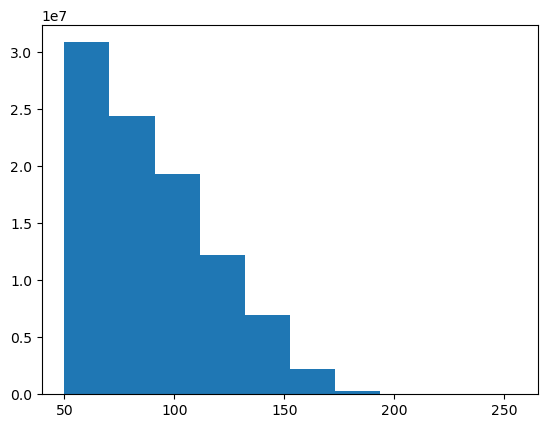

In [136]:
plt.hist(RGBvalues_uav_min['Red'])

(array([2.8025418e+07, 3.3262605e+07, 3.3656246e+07, 2.4174856e+07,
        1.5811806e+07, 7.2354040e+06, 1.7586210e+06, 8.8668000e+04,
        8.4460000e+03, 1.2396000e+04]),
 array([ 10. ,  34.5,  59. ,  83.5, 108. , 132.5, 157. , 181.5, 206. ,
        230.5, 255. ]),
 <BarContainer object of 10 artists>)

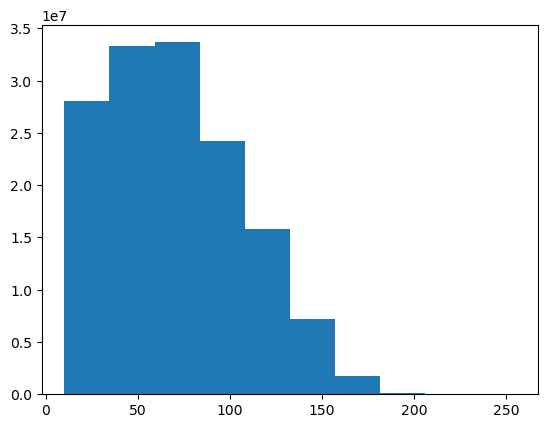

In [137]:
plt.hist(RGBvalues_uav['Red'])

In [146]:
RGBvalues_uav_1=RGBvalues_uav_min.groupby('file')[["Red", "Green", "Blue", 'GLI', 'NGRDI']].agg(['mean', 'median', 'sum']).reset_index()
RGBvalues_uav_1.columns = RGBvalues_uav_1.columns.map('_'.join)

In [147]:
RGBvalues_uav_1

,file_,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
0,CrawfordsvilleV2-TP2-4351_10_13,76.538552,73.0,21807058,101.814135,102.0,29008476,63.511172,61.0,18095349,0.190562,0.187500,54294.095459,0.140199,0.142857,39944.873813
1,CrawfordsvilleV2-TP2-4351_10_14,57.751783,55.0,16495584,83.829930,81.0,23944259,50.498664,46.0,14423883,0.213670,0.213930,61030.334993,0.175884,0.184000,50237.568495
2,CrawfordsvilleV2-TP2-4351_10_15,81.259361,79.0,23036460,108.002550,109.0,30617967,71.432032,70.0,20250481,0.177805,0.173913,50406.553958,0.140907,0.144186,39946.083326
3,CrawfordsvilleV2-TP2-4351_10_16,71.310147,67.0,20296080,97.006359,95.0,27609659,62.275560,59.0,17724683,0.185044,0.185185,52666.784732,0.144973,0.152104,41261.729030
4,CrawfordsvilleV2-TP2-4351_10_17,75.717131,69.0,21545461,99.896634,96.0,28425787,63.023925,57.0,17933584,0.184701,0.182186,52556.984170,0.134608,0.139319,38303.087835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,CrawfordsvilleV2-TP2-4353_9_42,87.923496,85.0,23431172,117.520847,122.0,31318718,74.954517,75.0,19975004,0.195532,0.190244,52108.254223,0.154172,0.155280,41086.169429
518,CrawfordsvilleV2-TP2-4353_9_43,80.620362,80.0,21486052,109.755164,114.0,29250739,71.834602,73.0,19144568,0.185509,0.184358,49439.914950,0.152287,0.157407,40585.849324
519,CrawfordsvilleV2-TP2-4353_9_44,83.600857,83.0,22019797,112.676243,117.0,29678021,72.216119,73.0,19021148,0.190187,0.185455,50093.831189,0.149902,0.151515,39482.882367
520,CrawfordsvilleV2-TP2-4353_9_45,78.078458,76.0,20567896,108.641068,111.0,28618882,66.612882,65.0,17547565,0.211163,0.206497,55625.889041,0.165082,0.171103,43486.993424


In [15]:
# RGBvalues_uav_1.columns=[['file','RedMean', 'RedMedian', 'RedSum','GreenMean','GreenMedian', 'GreenSum', 'BlueMean', 'BlueMedian', 'BlueSum', 'GLIMean', 'GLIMedian', 'GLIsum', 'NGRDIMean', 'NGRDIMedian', 'NGRDISum']]

In [148]:
RGBvalues_uav_1.describe()

,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
count,522.000000,522.000000,5.220000e+02,522.000000,522.000000,5.220000e+02,522.000000,522.000000,5.220000e+02,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,70.197197,68.049808,1.934505e+07,97.855416,98.574713,2.697099e+07,61.479518,59.444444,1.694499e+07,0.201332,0.200521,55559.203103,0.163607,0.170239,45159.531279
std,11.495821,12.213292,3.082138e+06,12.890163,15.038121,3.427553e+06,9.633455,10.975535,2.589669e+06,0.018324,0.018893,5382.029145,0.019903,0.020759,5780.961795
min,35.715273,32.000000,9.805271e+06,55.560305,51.000000,1.525353e+07,32.200470,28.000000,8.840317e+06,0.148208,0.150780,39378.611364,0.106872,0.108280,30423.587346
25%,61.414636,59.000000,1.708088e+07,88.296693,88.000000,2.451709e+07,54.598758,51.000000,1.512333e+07,0.188649,0.187032,51643.645404,0.149306,0.154670,40923.033057
50%,71.487096,69.000000,1.969213e+07,99.849258,100.000000,2.750688e+07,62.704341,61.000000,1.725634e+07,0.200567,0.199273,55150.406880,0.161308,0.167911,44431.261451
75%,79.287275,78.000000,2.168524e+07,107.884595,110.000000,2.956129e+07,68.801058,68.000000,1.890613e+07,0.211977,0.211743,59046.701645,0.176964,0.184834,49106.261828
max,96.710440,98.000000,2.584983e+07,125.578336,134.000000,3.367128e+07,82.947748,86.000000,2.252485e+07,0.269975,0.274151,75491.387909,0.229834,0.237624,64267.225605


In [149]:
# RGBvalues_uav# RGBvalue_UAV=RGBvalues
RGBvalues_uav_1['file_'] = RGBvalues_uav_1['file_'].str.replace('V2', '')

In [19]:
RGBvalues_uav_1.to_csv("RGBvalues_uavdf.csv", index=False)

In [150]:
RGBvalues_uav_1

,file_,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
0,Crawfordsville-TP2-4351_10_13,76.538552,73.0,21807058,101.814135,102.0,29008476,63.511172,61.0,18095349,0.190562,0.187500,54294.095459,0.140199,0.142857,39944.873813
1,Crawfordsville-TP2-4351_10_14,57.751783,55.0,16495584,83.829930,81.0,23944259,50.498664,46.0,14423883,0.213670,0.213930,61030.334993,0.175884,0.184000,50237.568495
2,Crawfordsville-TP2-4351_10_15,81.259361,79.0,23036460,108.002550,109.0,30617967,71.432032,70.0,20250481,0.177805,0.173913,50406.553958,0.140907,0.144186,39946.083326
3,Crawfordsville-TP2-4351_10_16,71.310147,67.0,20296080,97.006359,95.0,27609659,62.275560,59.0,17724683,0.185044,0.185185,52666.784732,0.144973,0.152104,41261.729030
4,Crawfordsville-TP2-4351_10_17,75.717131,69.0,21545461,99.896634,96.0,28425787,63.023925,57.0,17933584,0.184701,0.182186,52556.984170,0.134608,0.139319,38303.087835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Crawfordsville-TP2-4353_9_42,87.923496,85.0,23431172,117.520847,122.0,31318718,74.954517,75.0,19975004,0.195532,0.190244,52108.254223,0.154172,0.155280,41086.169429
518,Crawfordsville-TP2-4353_9_43,80.620362,80.0,21486052,109.755164,114.0,29250739,71.834602,73.0,19144568,0.185509,0.184358,49439.914950,0.152287,0.157407,40585.849324
519,Crawfordsville-TP2-4353_9_44,83.600857,83.0,22019797,112.676243,117.0,29678021,72.216119,73.0,19021148,0.190187,0.185455,50093.831189,0.149902,0.151515,39482.882367
520,Crawfordsville-TP2-4353_9_45,78.078458,76.0,20567896,108.641068,111.0,28618882,66.612882,65.0,17547565,0.211163,0.206497,55625.889041,0.165082,0.171103,43486.993424


In [151]:
concatenated_df = pd.merge(RGBvalues_uav_1, RGBvalues_satellite, on='file_', how='outer')
# concatenated_df.rename(columns={concatenated_df.columns[3]:"UAVVI"}, inplace=True)
concatenated_df

,file_,Red_mean_x,Red_median_x,Red_sum_x,Green_mean_x,Green_median_x,Green_sum_x,Blue_mean_x,Blue_median_x,Blue_sum_x,...,Green_sum_y,Blue_mean_y,Blue_median_y,Blue_sum_y,GLI_mean_y,GLI_median_y,GLI_sum_y,NGRDI_mean_y,NGRDI_median_y,NGRDI_sum_y
0,Crawfordsville-TP2-4351_10_13,76.538552,73.0,21807058,101.814135,102.0,29008476,63.511172,61.0,18095349,...,17721,73.123223,73.0,15429,0.084317,0.077364,17.790875,0.099954,0.087719,21.090288
1,Crawfordsville-TP2-4351_10_14,57.751783,55.0,16495584,83.829930,81.0,23944259,50.498664,46.0,14423883,...,15877,68.615000,70.0,13723,0.095420,0.089606,19.084090,0.120160,0.104545,24.032033
2,Crawfordsville-TP2-4351_10_15,81.259361,79.0,23036460,108.002550,109.0,30617967,71.432032,70.0,20250481,...,16402,73.235000,74.0,14647,0.073131,0.065789,14.626205,0.091265,0.074987,18.253099
3,Crawfordsville-TP2-4351_10_16,71.310147,67.0,20296080,97.006359,95.0,27609659,62.275560,59.0,17724683,...,17353,71.579439,74.0,15318,0.086727,0.079156,18.559498,0.112948,0.096226,24.170931
4,Crawfordsville-TP2-4351_10_17,75.717131,69.0,21545461,99.896634,96.0,28425787,63.023925,57.0,17933584,...,17269,70.105769,73.0,14582,0.108397,0.090909,22.546564,0.132753,0.101266,27.612721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Crawfordsville-TP2-4353_9_42,87.923496,85.0,23431172,117.520847,122.0,31318718,74.954517,75.0,19975004,...,20639,79.051643,82.0,16838,0.118235,0.097436,25.184147,0.133263,0.097826,28.384979
518,Crawfordsville-TP2-4353_9_43,80.620362,80.0,21486052,109.755164,114.0,29250739,71.834602,73.0,19144568,...,19278,75.718894,77.0,16431,0.098158,0.086835,21.300316,0.116560,0.096386,25.293451
519,Crawfordsville-TP2-4353_9_44,83.600857,83.0,22019797,112.676243,117.0,29678021,72.216119,73.0,19021148,...,18221,75.328431,78.0,15367,0.101771,0.087719,20.761284,0.119284,0.093023,24.333965
520,Crawfordsville-TP2-4353_9_45,78.078458,76.0,20567896,108.641068,111.0,28618882,66.612882,65.0,17547565,...,17704,74.630000,74.0,14926,0.095946,0.093725,19.189278,0.106337,0.100000,21.267329


In [62]:
concatenated_df.columns

Index(['file_', 'Red_mean_x', 'Red_median_x', 'Red_sum_x', 'Green_mean_x',
       'Green_median_x', 'Green_sum_x', 'Blue_mean_x', 'Blue_median_x',
       'Blue_sum_x', 'GLI_mean_x', 'GLI_median_x', 'GLI_sum_x', 'NGRDI_mean_x',
       'NGRDI_median_x', 'NGRDI_sum_x', 'Red_mean_y', 'Red_median_y',
       'Red_sum_y', 'Green_mean_y', 'Green_median_y', 'Green_sum_y',
       'Blue_mean_y', 'Blue_median_y', 'Blue_sum_y', 'GLI_mean_y',
       'GLI_median_y', 'GLI_sum_y', 'NGRDI_mean_y', 'NGRDI_median_y',
       'NGRDI_sum_y'],
      dtype='object')

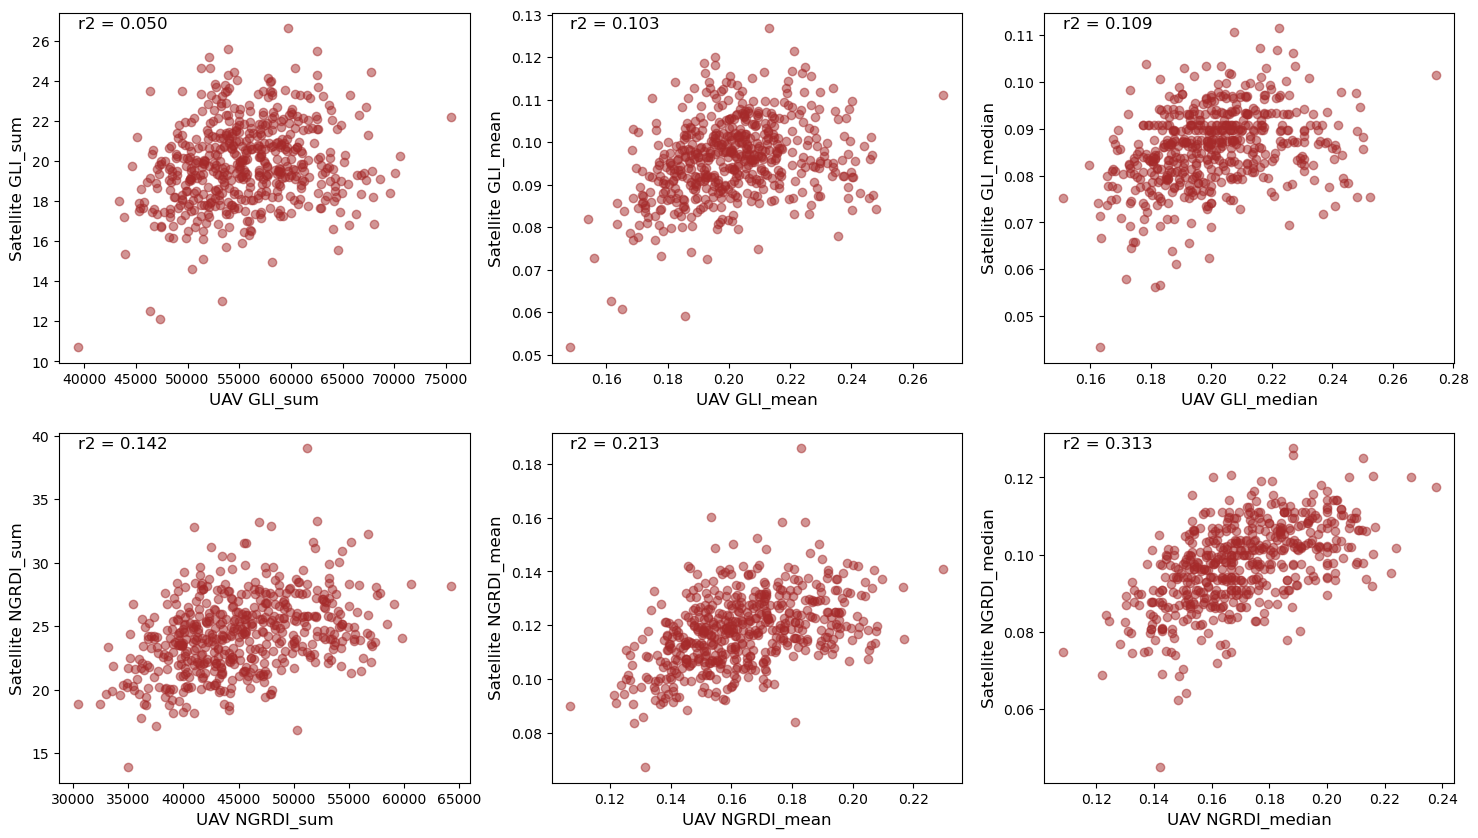

In [162]:
fig = plt.figure(figsize=(18,10))

#GLIsum
myax=fig.add_subplot(2,3,1)
myax.scatter(concatenated_df['GLI_sum_x'], concatenated_df['GLI_sum_y'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['GLI_sum_x'].tolist(),concatenated_df['GLI_sum_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['GLI_sum_x']), max(concatenated_df['GLI_sum_y'])), size=12)
myax.set_ylabel("Satellite GLI_sum",fontsize=12)
myax.set_xlabel("UAV GLI_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,2)
myax.scatter(concatenated_df['GLI_mean_x'], concatenated_df['GLI_mean_y'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['GLI_mean_x'].tolist(),concatenated_df['GLI_mean_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['GLI_mean_x']), max(concatenated_df['GLI_mean_y'])), size=12)
myax.set_ylabel("Satellite GLI_mean",fontsize=12)
myax.set_xlabel("UAV GLI_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,3)
myax.scatter(concatenated_df['GLI_median_x'], concatenated_df['GLI_median_y'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['GLI_median_x'].tolist(),concatenated_df['GLI_median_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['GLI_median_x']), max(concatenated_df['GLI_median_y'])), size=12)
myax.set_ylabel("Satellite GLI_median",fontsize=12)
myax.set_xlabel("UAV GLI_median", fontsize=12)

#GLIsum
myax=fig.add_subplot(2,3,4)
myax.scatter(concatenated_df['NGRDI_sum_x'], concatenated_df['NGRDI_sum_y'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['NGRDI_sum_x'].tolist(),concatenated_df['NGRDI_sum_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['NGRDI_sum_x']), max(concatenated_df['NGRDI_sum_y'])), size=12)
myax.set_ylabel("Satellite NGRDI_sum",fontsize=12)
myax.set_xlabel("UAV NGRDI_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,5)
myax.scatter(concatenated_df['NGRDI_mean_x'], concatenated_df['NGRDI_mean_y'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['NGRDI_mean_x'].tolist(),concatenated_df['NGRDI_mean_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['NGRDI_mean_x']), max(concatenated_df['NGRDI_mean_y'])), size=12)
myax.set_ylabel("Satellite NGRDI_mean",fontsize=12)
myax.set_xlabel("UAV NGRDI_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,6)
myax.scatter(concatenated_df['NGRDI_median_x'], concatenated_df['NGRDI_median_y'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['NGRDI_median_x'].tolist(),concatenated_df['NGRDI_median_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['NGRDI_median_x']), max(concatenated_df['NGRDI_median_y'])), size=12)
myax.set_ylabel("Satellite NGRDI_median",fontsize=12)
myax.set_xlabel("UAV NGRDI_median", fontsize=12)


plt.savefig("VIs_TP2.png")

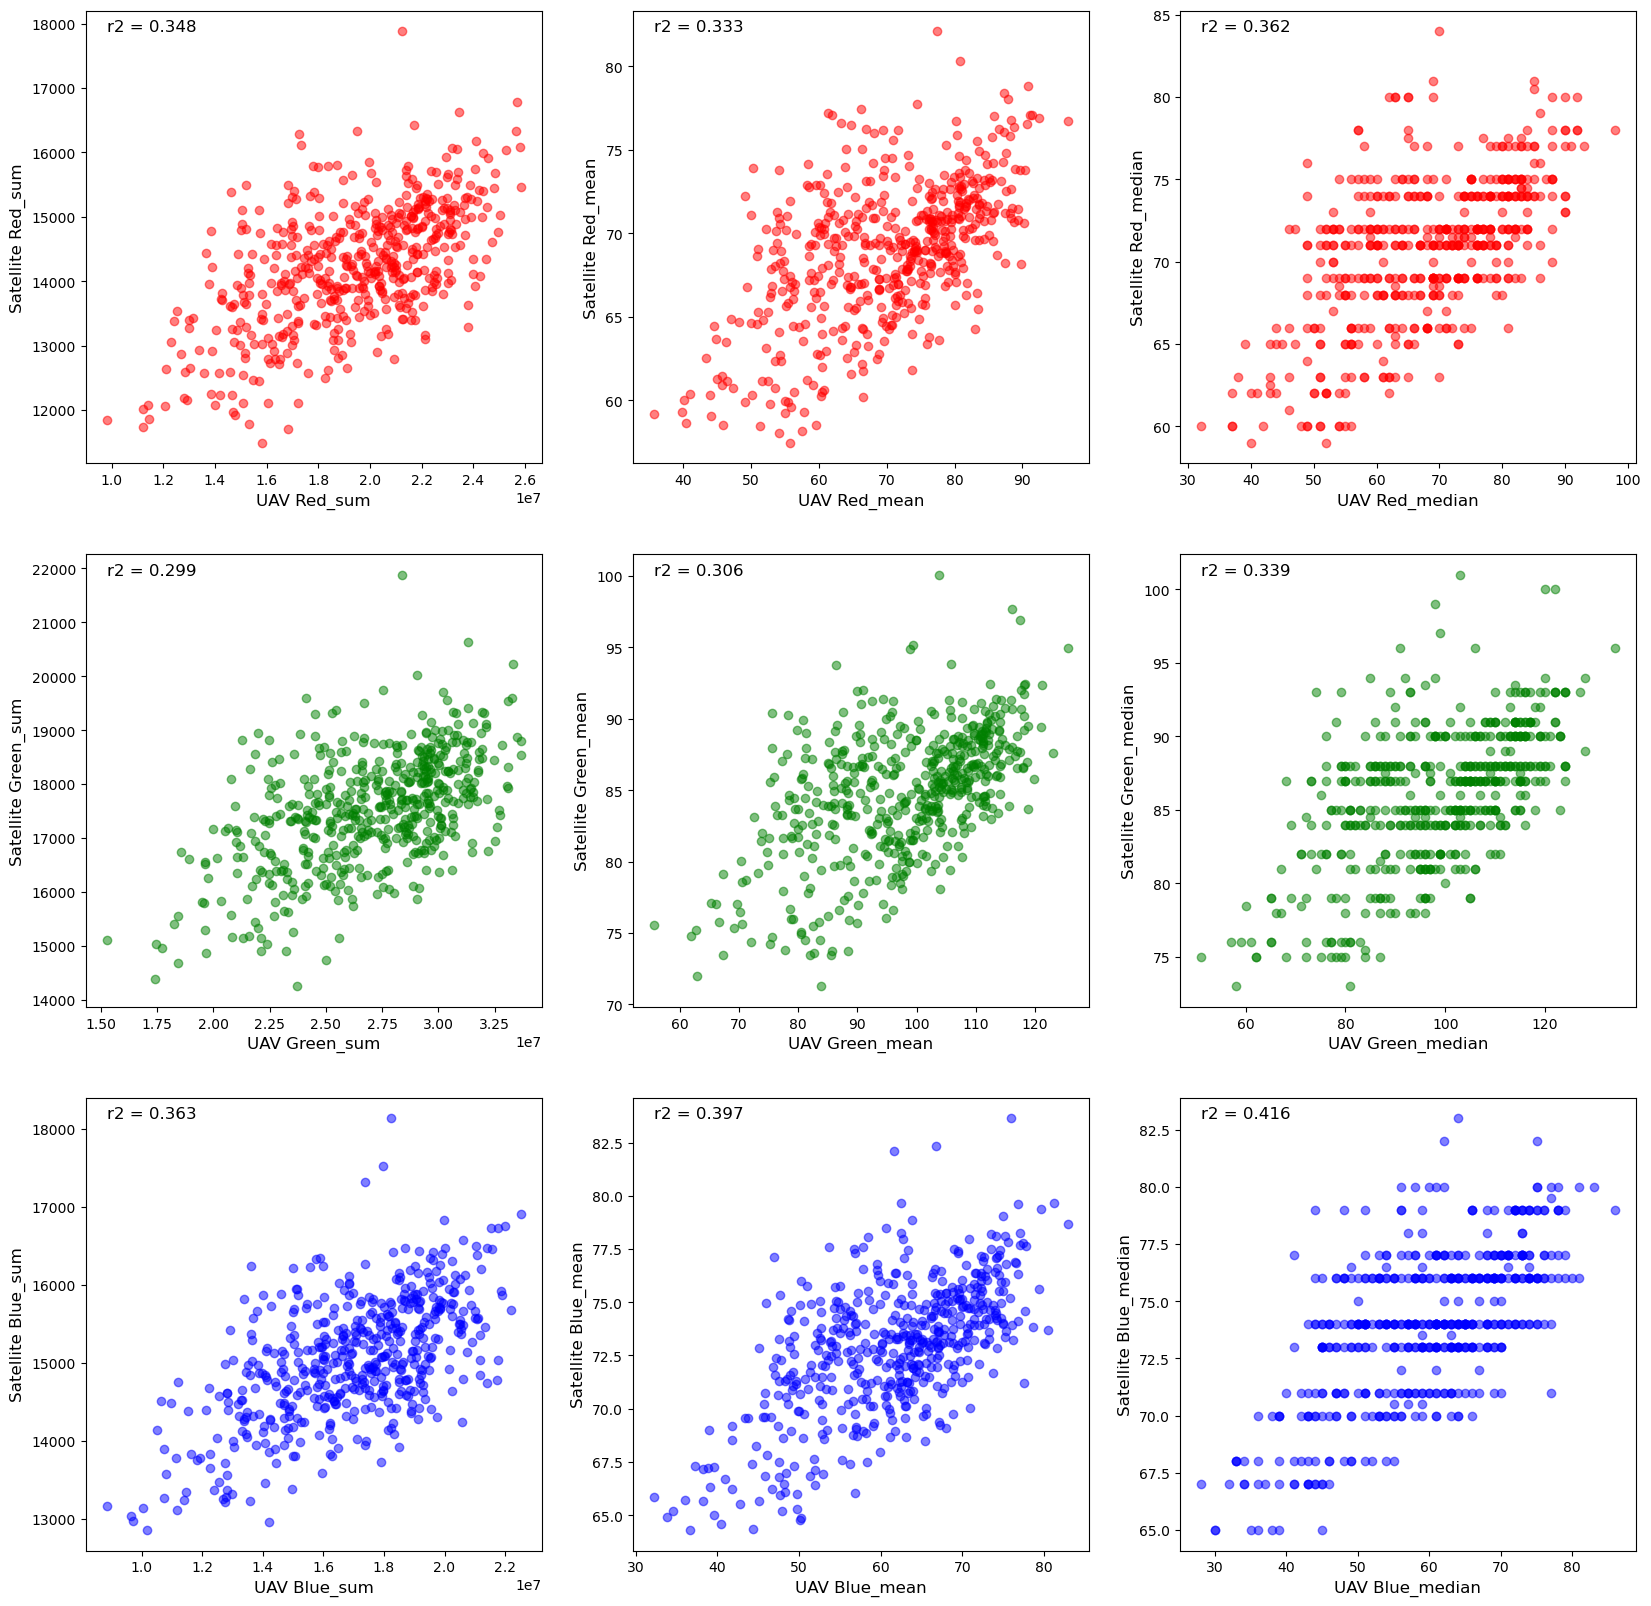

In [163]:
fig = plt.figure(figsize=(20,20))

#GLIsum
myax=fig.add_subplot(3,3,1)
myax.scatter(concatenated_df['Red_sum_x'], concatenated_df['Red_sum_y'], color='red', alpha=0.5)
r, pval = pearsonr(concatenated_df['Red_sum_x'].tolist(),concatenated_df['Red_sum_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Red_sum_x']), max(concatenated_df['Red_sum_y'])), size=12)
myax.set_ylabel("Satellite Red_sum",fontsize=12)
myax.set_xlabel("UAV Red_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,2)
myax.scatter(concatenated_df['Red_mean_x'], concatenated_df['Red_mean_y'], color='red', alpha=0.5)
r, pval = pearsonr(concatenated_df['Red_mean_x'].tolist(),concatenated_df['Red_mean_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Red_mean_x']), max(concatenated_df['Red_mean_y'])), size=12)
myax.set_ylabel("Satellite Red_mean",fontsize=12)
myax.set_xlabel("UAV Red_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,3)
myax.scatter(concatenated_df['Red_median_x'], concatenated_df['Red_median_y'], color='red', alpha=0.5)
r, pval = pearsonr(concatenated_df['Red_median_x'].tolist(),concatenated_df['Red_median_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Red_median_x']), max(concatenated_df['Red_median_y'])), size=12)
myax.set_ylabel("Satellite Red_median",fontsize=12)
myax.set_xlabel("UAV Red_median", fontsize=12)

#GLIsum
myax=fig.add_subplot(3,3,4)
myax.scatter(concatenated_df['Green_sum_x'], concatenated_df['Green_sum_y'], color='Green', alpha=0.5)
r, pval = pearsonr(concatenated_df['Green_sum_x'].tolist(),concatenated_df['Green_sum_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Green_sum_x']), max(concatenated_df['Green_sum_y'])), size=12)
myax.set_ylabel("Satellite Green_sum",fontsize=12)
myax.set_xlabel("UAV Green_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,5)
myax.scatter(concatenated_df['Green_mean_x'], concatenated_df['Green_mean_y'], color='Green', alpha=0.5)
r, pval = pearsonr(concatenated_df['Green_mean_x'].tolist(),concatenated_df['Green_mean_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Green_mean_x']), max(concatenated_df['Green_mean_y'])), size=12)
myax.set_ylabel("Satellite Green_mean",fontsize=12)
myax.set_xlabel("UAV Green_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,6)
myax.scatter(concatenated_df['Green_median_x'], concatenated_df['Green_median_y'], color='Green', alpha=0.5)
r, pval = pearsonr(concatenated_df['Green_median_x'].tolist(),concatenated_df['Green_median_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Green_median_x']), max(concatenated_df['Green_median_y'])), size=12)
myax.set_ylabel("Satellite Green_median",fontsize=12)
myax.set_xlabel("UAV Green_median", fontsize=12)


#GLIsum
myax=fig.add_subplot(3,3,7)
myax.scatter(concatenated_df['Blue_sum_x'], concatenated_df['Blue_sum_y'], color='Blue', alpha=0.5)
r, pval = pearsonr(concatenated_df['Blue_sum_x'].tolist(),concatenated_df['Blue_sum_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Blue_sum_x']), max(concatenated_df['Blue_sum_y'])), size=12)
myax.set_ylabel("Satellite Blue_sum",fontsize=12)
myax.set_xlabel("UAV Blue_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,8)
myax.scatter(concatenated_df['Blue_mean_x'], concatenated_df['Blue_mean_y'], color='Blue', alpha=0.5)
r, pval = pearsonr(concatenated_df['Blue_mean_x'].tolist(),concatenated_df['Blue_mean_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Blue_mean_x']), max(concatenated_df['Blue_mean_y'])), size=12)
myax.set_ylabel("Satellite Blue_mean",fontsize=12)
myax.set_xlabel("UAV Blue_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,9)
myax.scatter(concatenated_df['Blue_median_x'], concatenated_df['Blue_median_y'], color='Blue', alpha=0.5)
r, pval = pearsonr(concatenated_df['Blue_median_x'].tolist(),concatenated_df['Blue_median_y'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Blue_median_x']), max(concatenated_df['Blue_median_y'])), size=12)
myax.set_ylabel("Satellite Blue_median",fontsize=12)
myax.set_xlabel("UAV Blue_median", fontsize=12)


plt.savefig("ColorChannels_TP2.png")

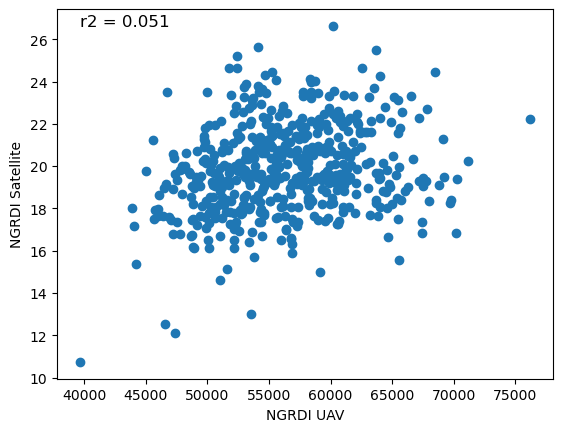

In [63]:
plt.scatter(concatenated_df['GLI_sum_x'], concatenated_df['GLI_sum_y'])
r, pval = pearsonr(concatenated_df['GLI_sum_x'].tolist(),concatenated_df['GLI_sum_y'].tolist())
r2 =r**2
plt.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['GLI_sum_x']), max(concatenated_df['GLI_sum_y'])), size=12)
plt.xlabel("NGRDI UAV")
plt.ylabel("NGRDI Satellite")
plt.savefig("MOValley_TP2_hybrids_GLI.png")

In [68]:
# RGBvalues=RGB(path)
# pca = PCA(n_components=3)
# embedding = pca.fit_transform(RGBvalues[["Red", "Green", "Blue"]].T)
# PCAdf=pd.DataFrame(pca.components_.T)
# PCAdf.columns=[["PC1", "PC2", "PC3"]]
# RGBvalues=pd.concat([RGBvalues, PCAdf], axis=1)
# new_column_names = {('PC1',): "PC1",('PC2',): "PC2",('PC3',): "PC3"}

# # Rename the columns using the dictionary
# RGBvalues = RGBvalues.rename(columns=new_column_names)

# RGBvalues

In [314]:
Hipsdf=pd.read_csv("/home/schnablelab/Documents/NNSatelliteImages/Data/HIPS_2022_V3.5_HYBRIDS.csv", sep=",")

In [315]:
Hipsdf=Hipsdf.loc[Hipsdf["location"]=="Crawfordsville",]
Hipsdf.columns

Index(['qrCode', 'location', 'sublocation', 'irrigationProvided',
       'nitrogenTreatment', 'poundsOfNitrogenPerAcre', 'experiment',
       'plotLength', 'totalStandCount', 'block', 'row', 'range', 'plotNumber',
       'genotype', 'plantingDate', 'anthesisDate', 'silkDate',
       'daysToAnthesis', 'daysToSilk', 'anthesisSilkingInterval',
       'GDDToAnthesis', 'GDDToSilk', 'anthesisSilkingIntervalGDD', 'earHeight',
       'flagLeafHeight', 'plantDensity', 'combineYield', 'yieldPerAcre',
       'combineMoisture', 'combineTestWeight', 'earLength', 'earFillLength',
       'earWidth', 'shelledCobWidth', 'kernelsPerRow', 'kernelRowNumber',
       'kernelsPerEar', 'hundredKernelMass', 'kernelMassPerEar',
       'shelledCobMass', 'percentMoisture', 'percentStarch', 'percentProtein',
       'percentOil', 'percentFiber', 'percentAsh', 'kernelColor',
       'percentLodging', 'harvestDate', 'notes'],
      dtype='object')

In [316]:
Hipsdf["row"].value_counts()

row
46    34
44    33
43    33
45    32
42    31
20    22
13    22
16    22
17    22
4     21
5     21
6     21
8     21
9     21
15    20
7     20
18    19
3     19
14    19
2     19
19    17
Name: count, dtype: int64

In [317]:
RGBvalues[['field', 'range', 'row']]=RGBvalues["file"].str.split('_', expand=True)

In [318]:
RGBvalues.columns

Index(['file', 'Red', 'Green', 'Blue', 'PC1', 'PC2', 'PC3', 'field', 'range',
       'row'],
      dtype='object')

In [319]:
Hipsdf.columns

Index(['qrCode', 'location', 'sublocation', 'irrigationProvided',
       'nitrogenTreatment', 'poundsOfNitrogenPerAcre', 'experiment',
       'plotLength', 'totalStandCount', 'block', 'row', 'range', 'plotNumber',
       'genotype', 'plantingDate', 'anthesisDate', 'silkDate',
       'daysToAnthesis', 'daysToSilk', 'anthesisSilkingInterval',
       'GDDToAnthesis', 'GDDToSilk', 'anthesisSilkingIntervalGDD', 'earHeight',
       'flagLeafHeight', 'plantDensity', 'combineYield', 'yieldPerAcre',
       'combineMoisture', 'combineTestWeight', 'earLength', 'earFillLength',
       'earWidth', 'shelledCobWidth', 'kernelsPerRow', 'kernelRowNumber',
       'kernelsPerEar', 'hundredKernelMass', 'kernelMassPerEar',
       'shelledCobMass', 'percentMoisture', 'percentStarch', 'percentProtein',
       'percentOil', 'percentFiber', 'percentAsh', 'kernelColor',
       'percentLodging', 'harvestDate', 'notes'],
      dtype='object')

In [320]:
for index1, row1 in RGBvalues.iterrows():
    file=row1['field']
    field=int(file.split("-")[2])
    try:
        range1 = int(row1["range"])
    except ValueError:
        print(f"Unable to convert 'range1' for index {index1} to an integer.")
        continue
    rownum=int(row1["row"])
            
    
    for index2, row2 in Hipsdf.iterrows():
        field2=int(row2["experiment"].split("_")[1])
        range2=row2["range"]
        row_2=row2["row"]
        
        if field==field2 and range1==range2 and rownum==row_2:
            RGBvalues.at[index1, "plantDensity"]=row2["plantDensity"]
            RGBvalues.at[index1, 'combineYield']=row2["combineYield"]
            RGBvalues.at[index1, 'yieldPerAcre']=row2["yieldPerAcre"]
            RGBvalues.at[index1, 'totalStandCount']=row2["totalStandCount"]
            RGBvalues.at[index1, 'daysToAnthesis']=row2["daysToAnthesis"]
            RGBvalues.at[index1, 'GDDToAnthesis']=row2["GDDToAnthesis"]
            RGBvalues.at[index1, 'daysToSilk']=row2["daysToSilk"]
            RGBvalues.at[index1, 'GDDToSilk']=row2["GDDToSilk"]
            RGBvalues.at[index1, 'percentMoisture']=row2["percentMoisture"]
            RGBvalues.at[index1, 'percentStarch']=row2["percentStarch"]
            RGBvalues.at[index1, 'percentProtein']=row2["percentProtein"]
            RGBvalues.at[index1, 'percentOil']=row2["percentOil"]
            RGBvalues.at[index1, 'percentFiber']=row2["percentFiber"]
            RGBvalues.at[index1, 'percentAsh']=row2["percentAsh"]
            RGBvalues.at[index1, 'percentLodging']=row2["percentLodging"]
            RGBvalues.at[index1, 'flagLeafHeight']=row2["flagLeafHeight"]
            
    

In [321]:
RGBvalues

,file,Red,Green,Blue,PC1,PC2,PC3,field,range,row,...,daysToSilk,GDDToSilk,percentMoisture,percentStarch,percentProtein,percentOil,percentFiber,percentAsh,percentLodging,flagLeafHeight
0,Crawfordsville-TP1-4352_7_8,58.095238,75.212121,67.212121,0.046280,0.055081,0.325770,Crawfordsville-TP1-4352,7,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,255.0
1,Crawfordsville-TP1-4352_7_2,59.450216,77.285714,68.004329,0.048396,0.020933,0.056166,Crawfordsville-TP1-4352,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.69,265.0
2,Crawfordsville-TP1-4353_35_43,54.665289,71.095041,61.429752,0.044787,-0.023731,0.032852,Crawfordsville-TP1-4353,35,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,217.0
3,Crawfordsville-TP1-4351_10_13,56.442149,73.760331,64.884298,0.046968,0.025575,0.036895,Crawfordsville-TP1-4351,10,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.54,230.0
4,Crawfordsville-TP1-4352_9_8,56.442149,72.710744,63.115702,0.044352,-0.024445,0.015698,Crawfordsville-TP1-4352,9,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,262.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Crawfordsville-TP1-4353_21_45,46.121212,60.503788,53.715909,0.038899,0.043744,0.016717,Crawfordsville-TP1-4353,21,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.03,233.0
518,Crawfordsville-TP1-4352_7_3,61.437229,78.913420,69.554113,0.047470,0.010296,0.054043,Crawfordsville-TP1-4352,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,217.0
519,Crawfordsville-TP1-4351_8_16,55.587302,71.305556,62.619048,0.042744,-0.001100,0.034825,Crawfordsville-TP1-4351,8,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,229.0
520,Crawfordsville-TP1-4352_16_4,52.396694,68.768595,58.938017,0.044666,-0.031334,-0.001284,Crawfordsville-TP1-4352,16,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,255.0


In [322]:
RGBvalues.columns

Index(['file', 'Red', 'Green', 'Blue', 'PC1', 'PC2', 'PC3', 'field', 'range',
       'row', 'plantDensity', 'combineYield', 'yieldPerAcre',
       'totalStandCount', 'daysToAnthesis', 'GDDToAnthesis', 'daysToSilk',
       'GDDToSilk', 'percentMoisture', 'percentStarch', 'percentProtein',
       'percentOil', 'percentFiber', 'percentAsh', 'percentLodging',
       'flagLeafHeight'],
      dtype='object')

7


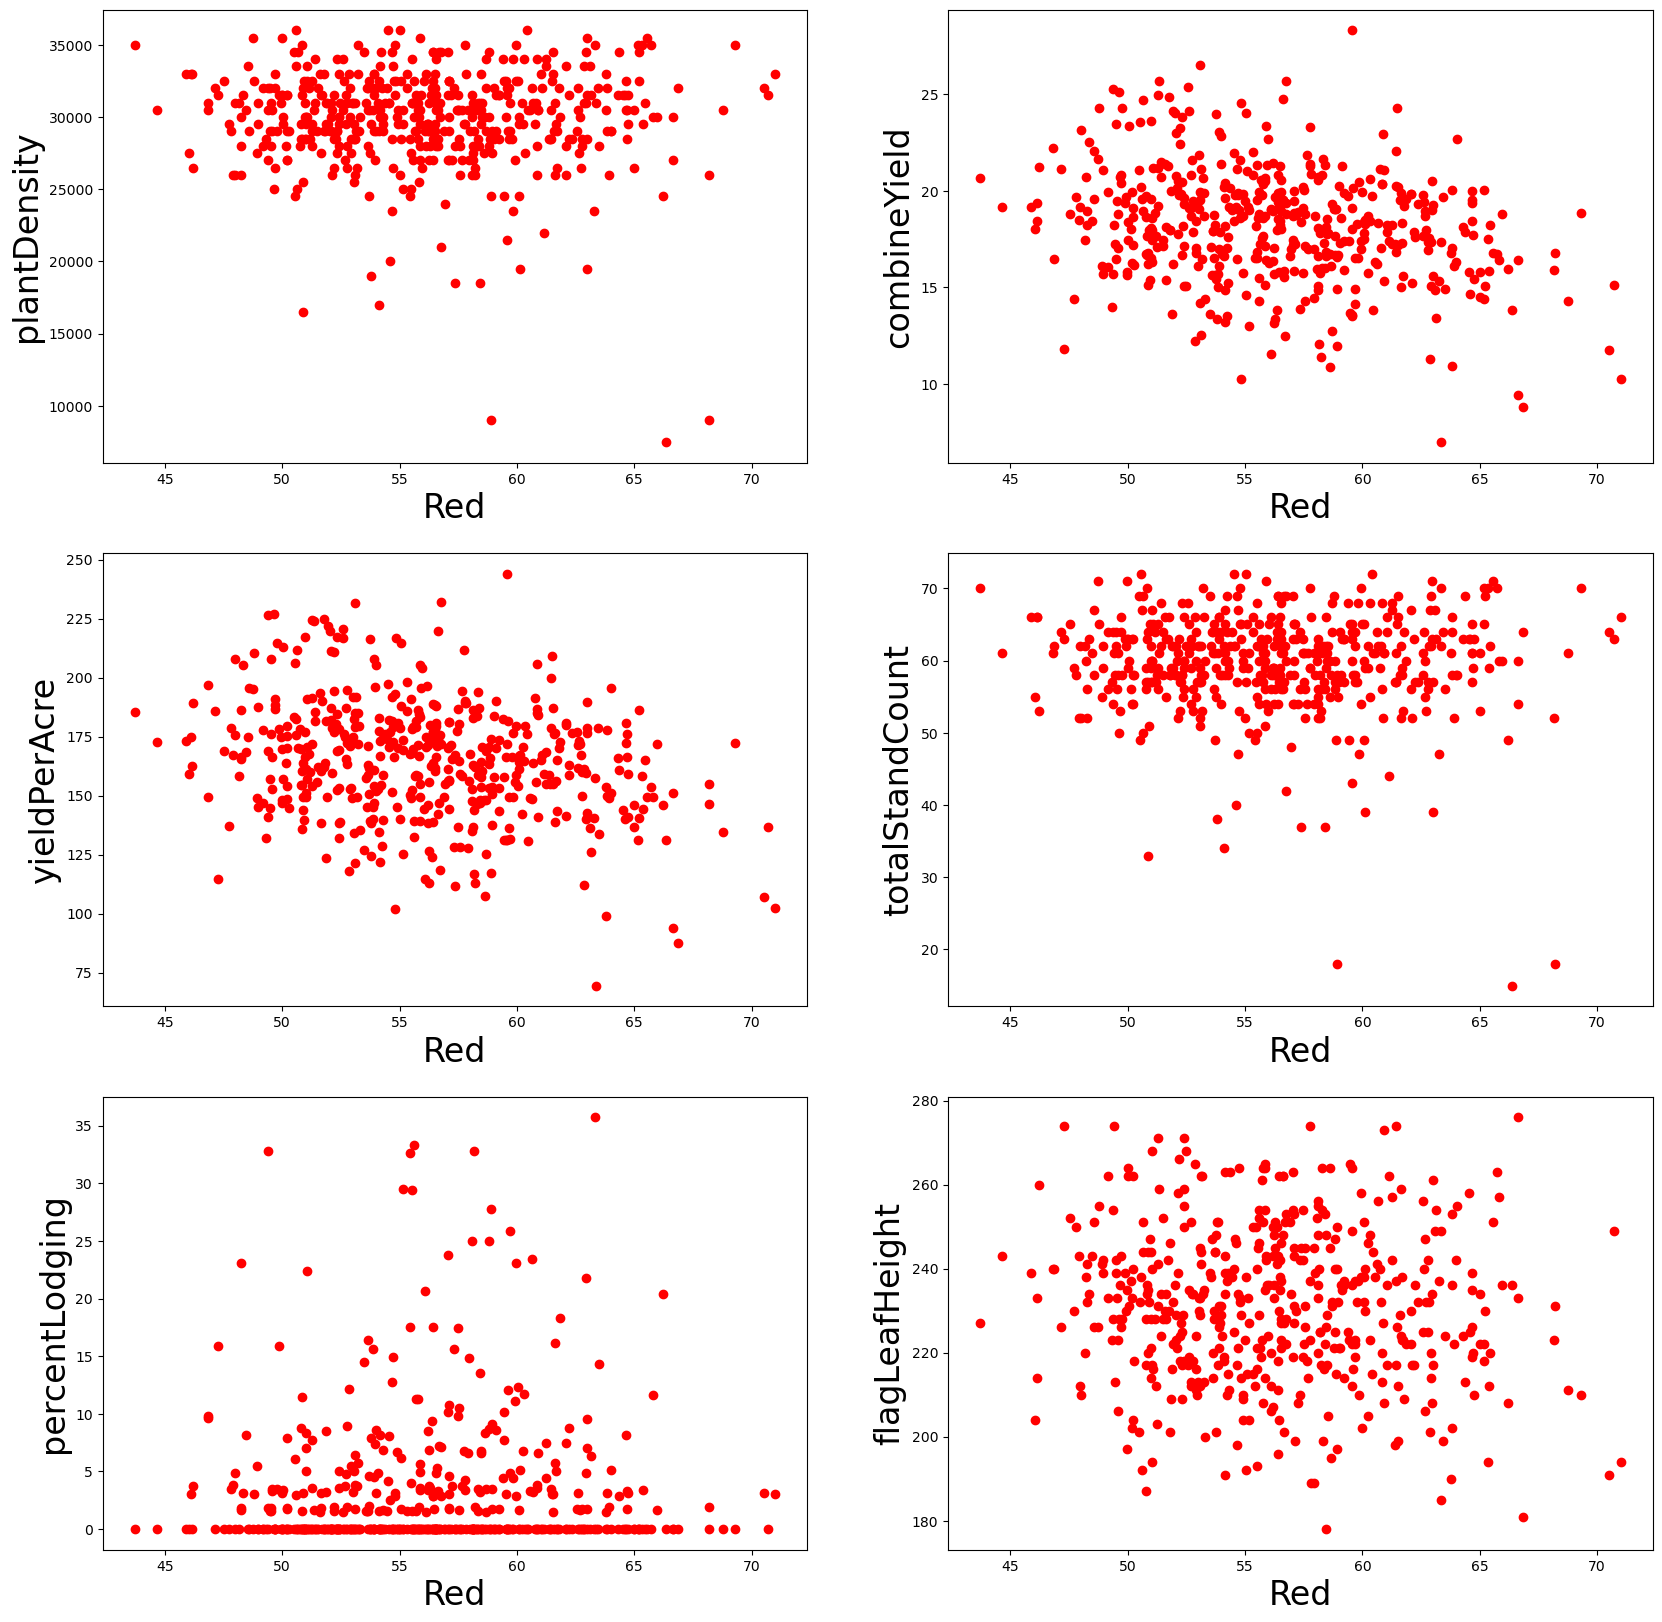

In [323]:
new_column_names=RGBvalues.columns[[10,11,12,13,24,25,1]]
print(len(new_column_names))
fig = plt.figure(figsize=(20,20))

num=1
for i in new_column_names:
    myax=fig.add_subplot(3,2,num)
    RGBvalues_plotting=RGBvalues[['Red', i]]
    myax.scatter(RGBvalues_plotting['Red'], RGBvalues_plotting[i], color='red', alpha=1)
    myax.set_xlabel("Red",fontsize=24)
    myax.set_ylabel(i, fontsize=24)
    
#     plt.xlim(24900,25000)
#     plt.title(str(i))
    if num==6: break
    num+=1
plt.savefig("../NNSatelliteImages/Data/red_"+TP+"_Crawfordsville.png")

7


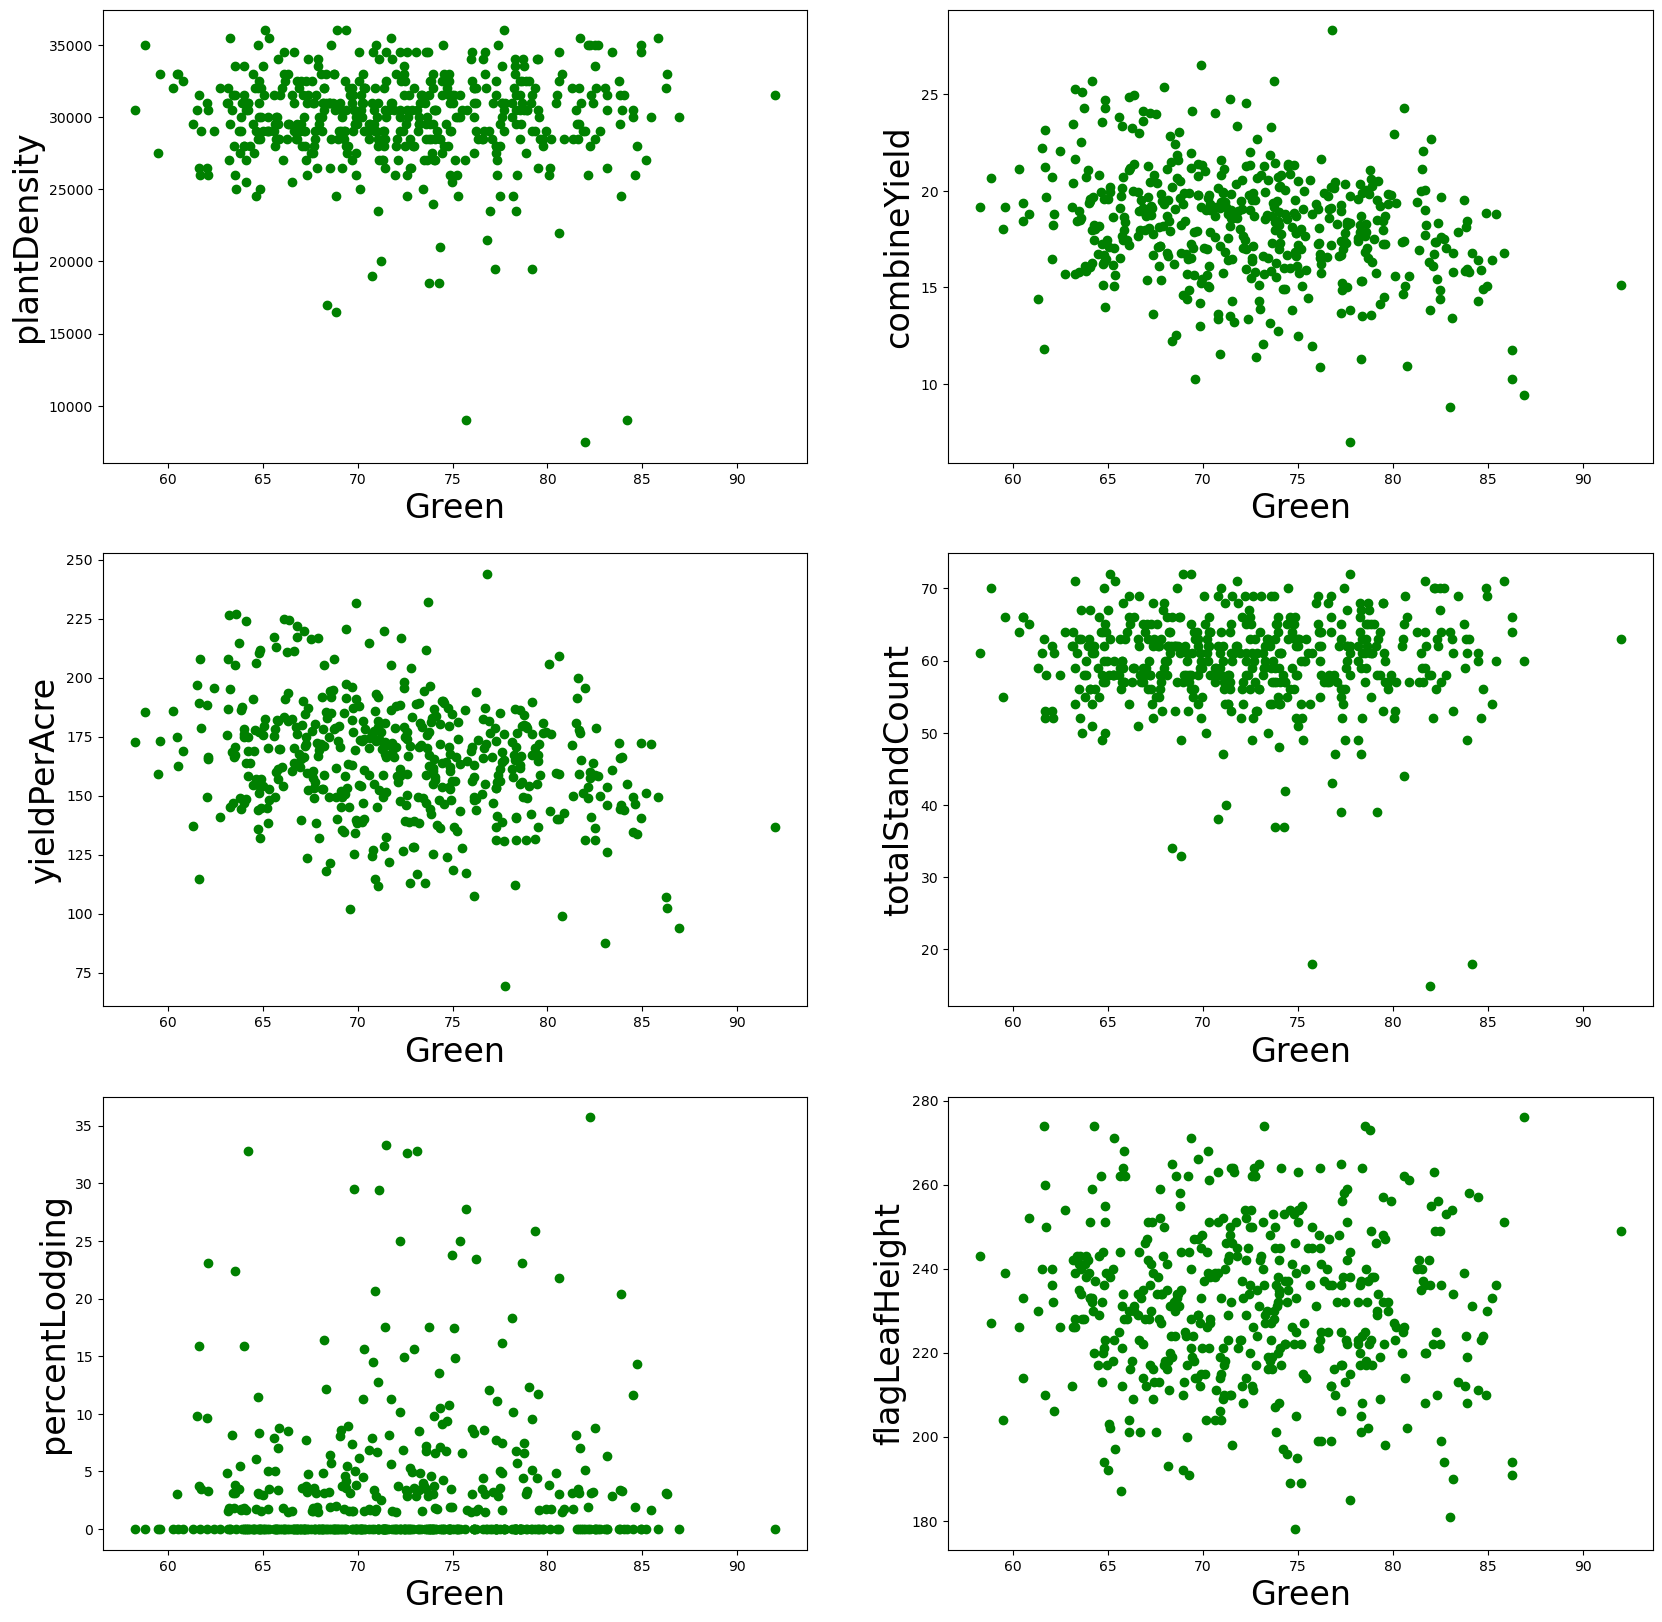

In [326]:
new_column_names=RGBvalues.columns[[10,11,12,13,24,25,2]]
print(len(new_column_names))
fig = plt.figure(figsize=(20,20))

num=1
for i in new_column_names:
    myax=fig.add_subplot(3,2,num)
    RGBvalues_plotting=RGBvalues[['Green', i]]
    myax.scatter(RGBvalues_plotting['Green'], RGBvalues_plotting[i], color='green', alpha=1)
    myax.set_xlabel("Green",fontsize=24)
    myax.set_ylabel(i, fontsize=24)
    
#     plt.xlim(24900,25000)
#     plt.title(str(i))
    if num==6: break
    num+=1
plt.savefig("../NNSatelliteImages/Data/green_"+TP+"_Crawfordsville.png")

7


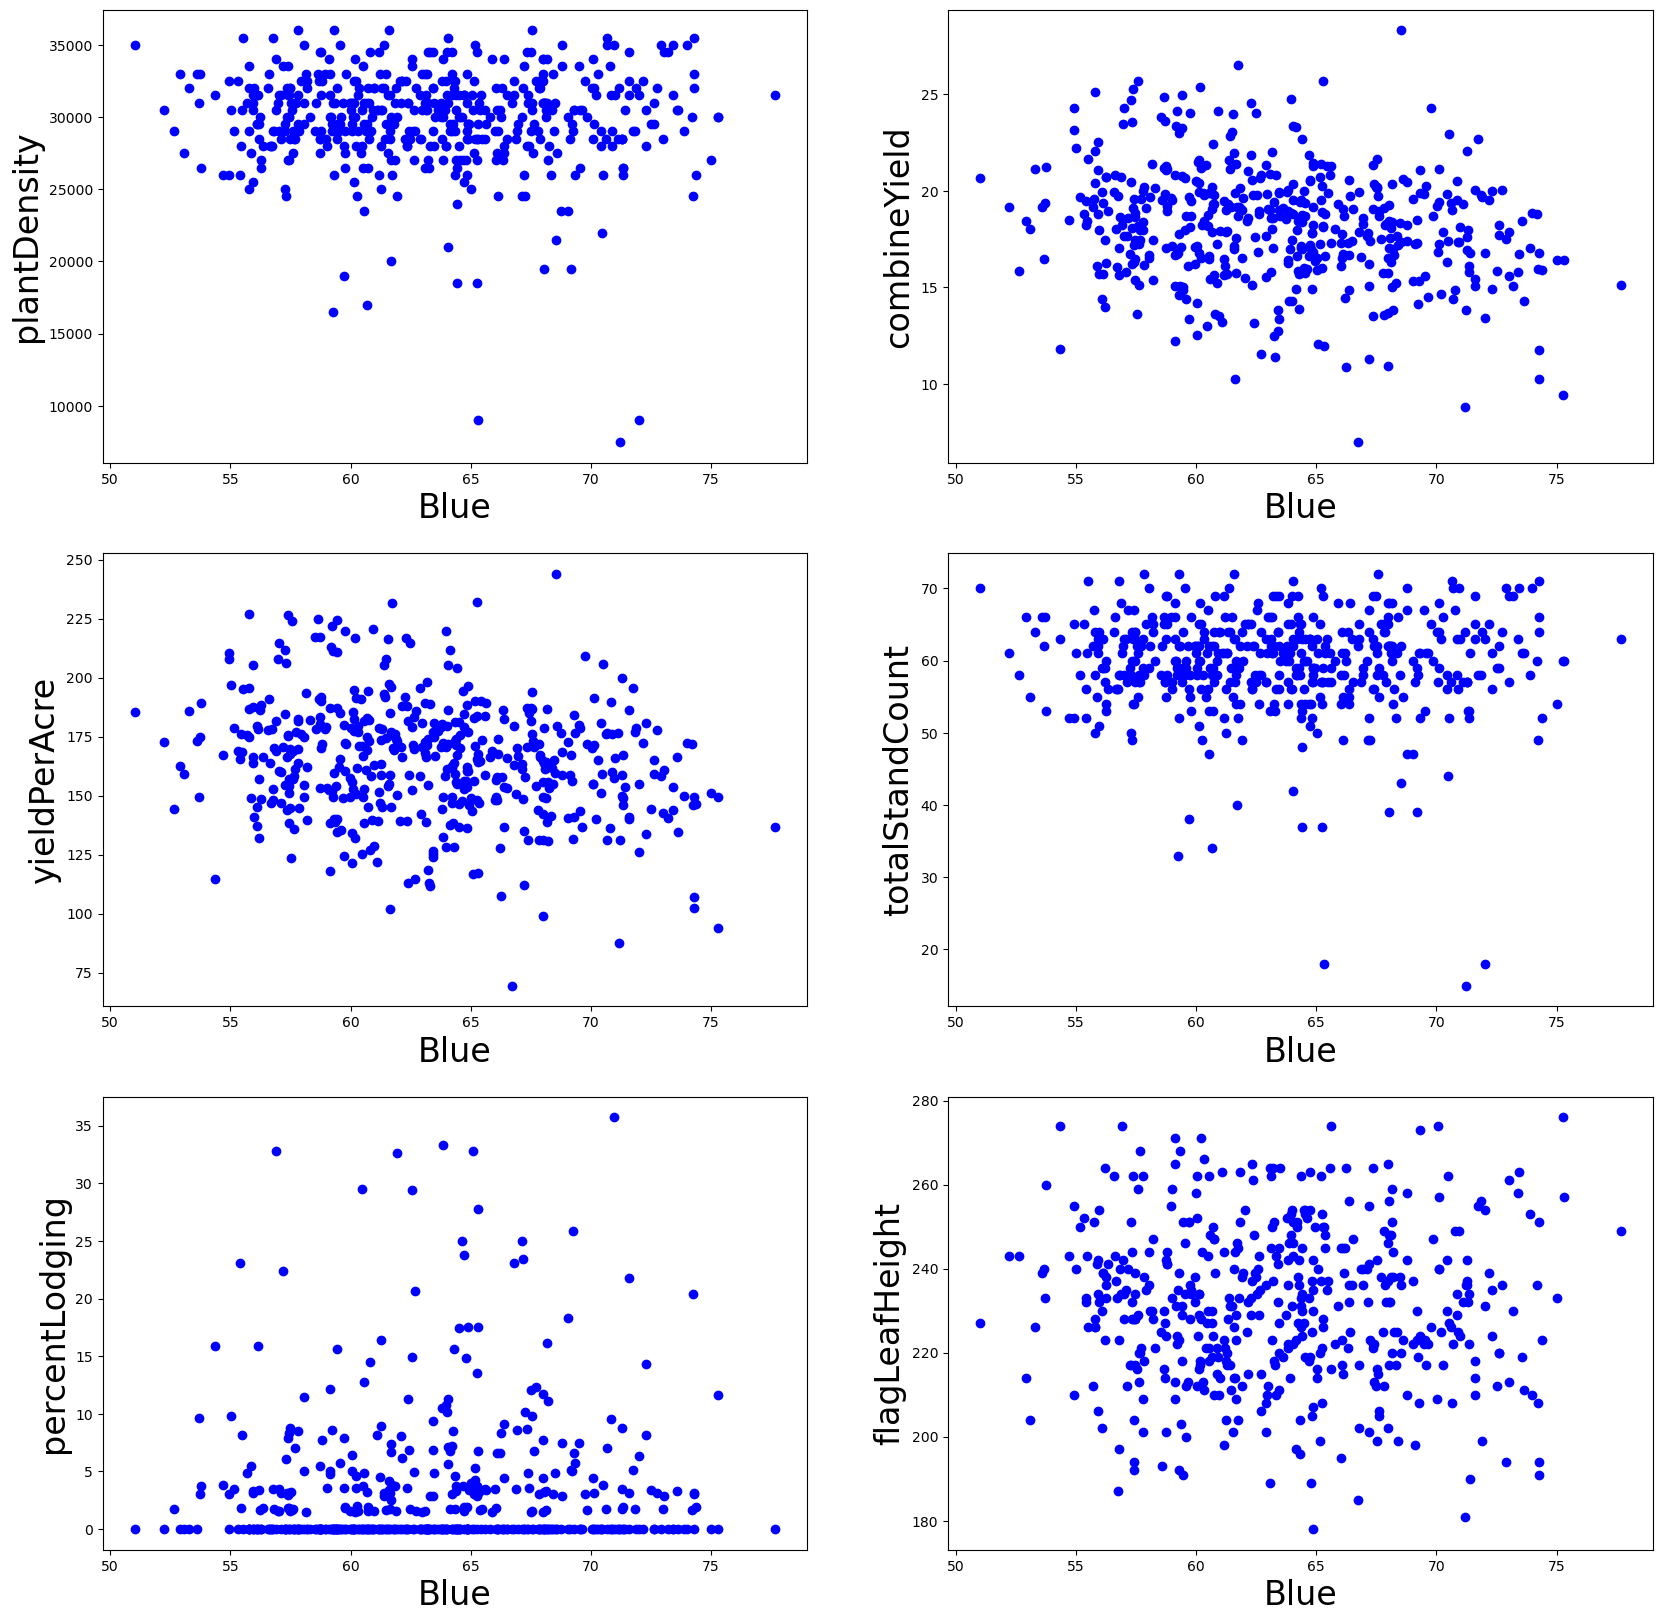

In [327]:
new_column_names=RGBvalues.columns[[10,11,12,13,24,25,3]]
print(len(new_column_names))
fig = plt.figure(figsize=(20,20))

num=1
for i in new_column_names:
    myax=fig.add_subplot(3,2,num)
    RGBvalues_plotting=RGBvalues[['Blue', i]]
    myax.scatter(RGBvalues_plotting['Blue'], RGBvalues_plotting[i], color='blue', alpha=1)
    myax.set_xlabel("Blue",fontsize=24)
    myax.set_ylabel(i, fontsize=24)
    
#     plt.xlim(24900,25000)
#     plt.title(str(i))
    if num==6: break
    num+=1
plt.savefig("../NNSatelliteImages/Data/Blue_"+TP+"_Crawfordsville.png")

7


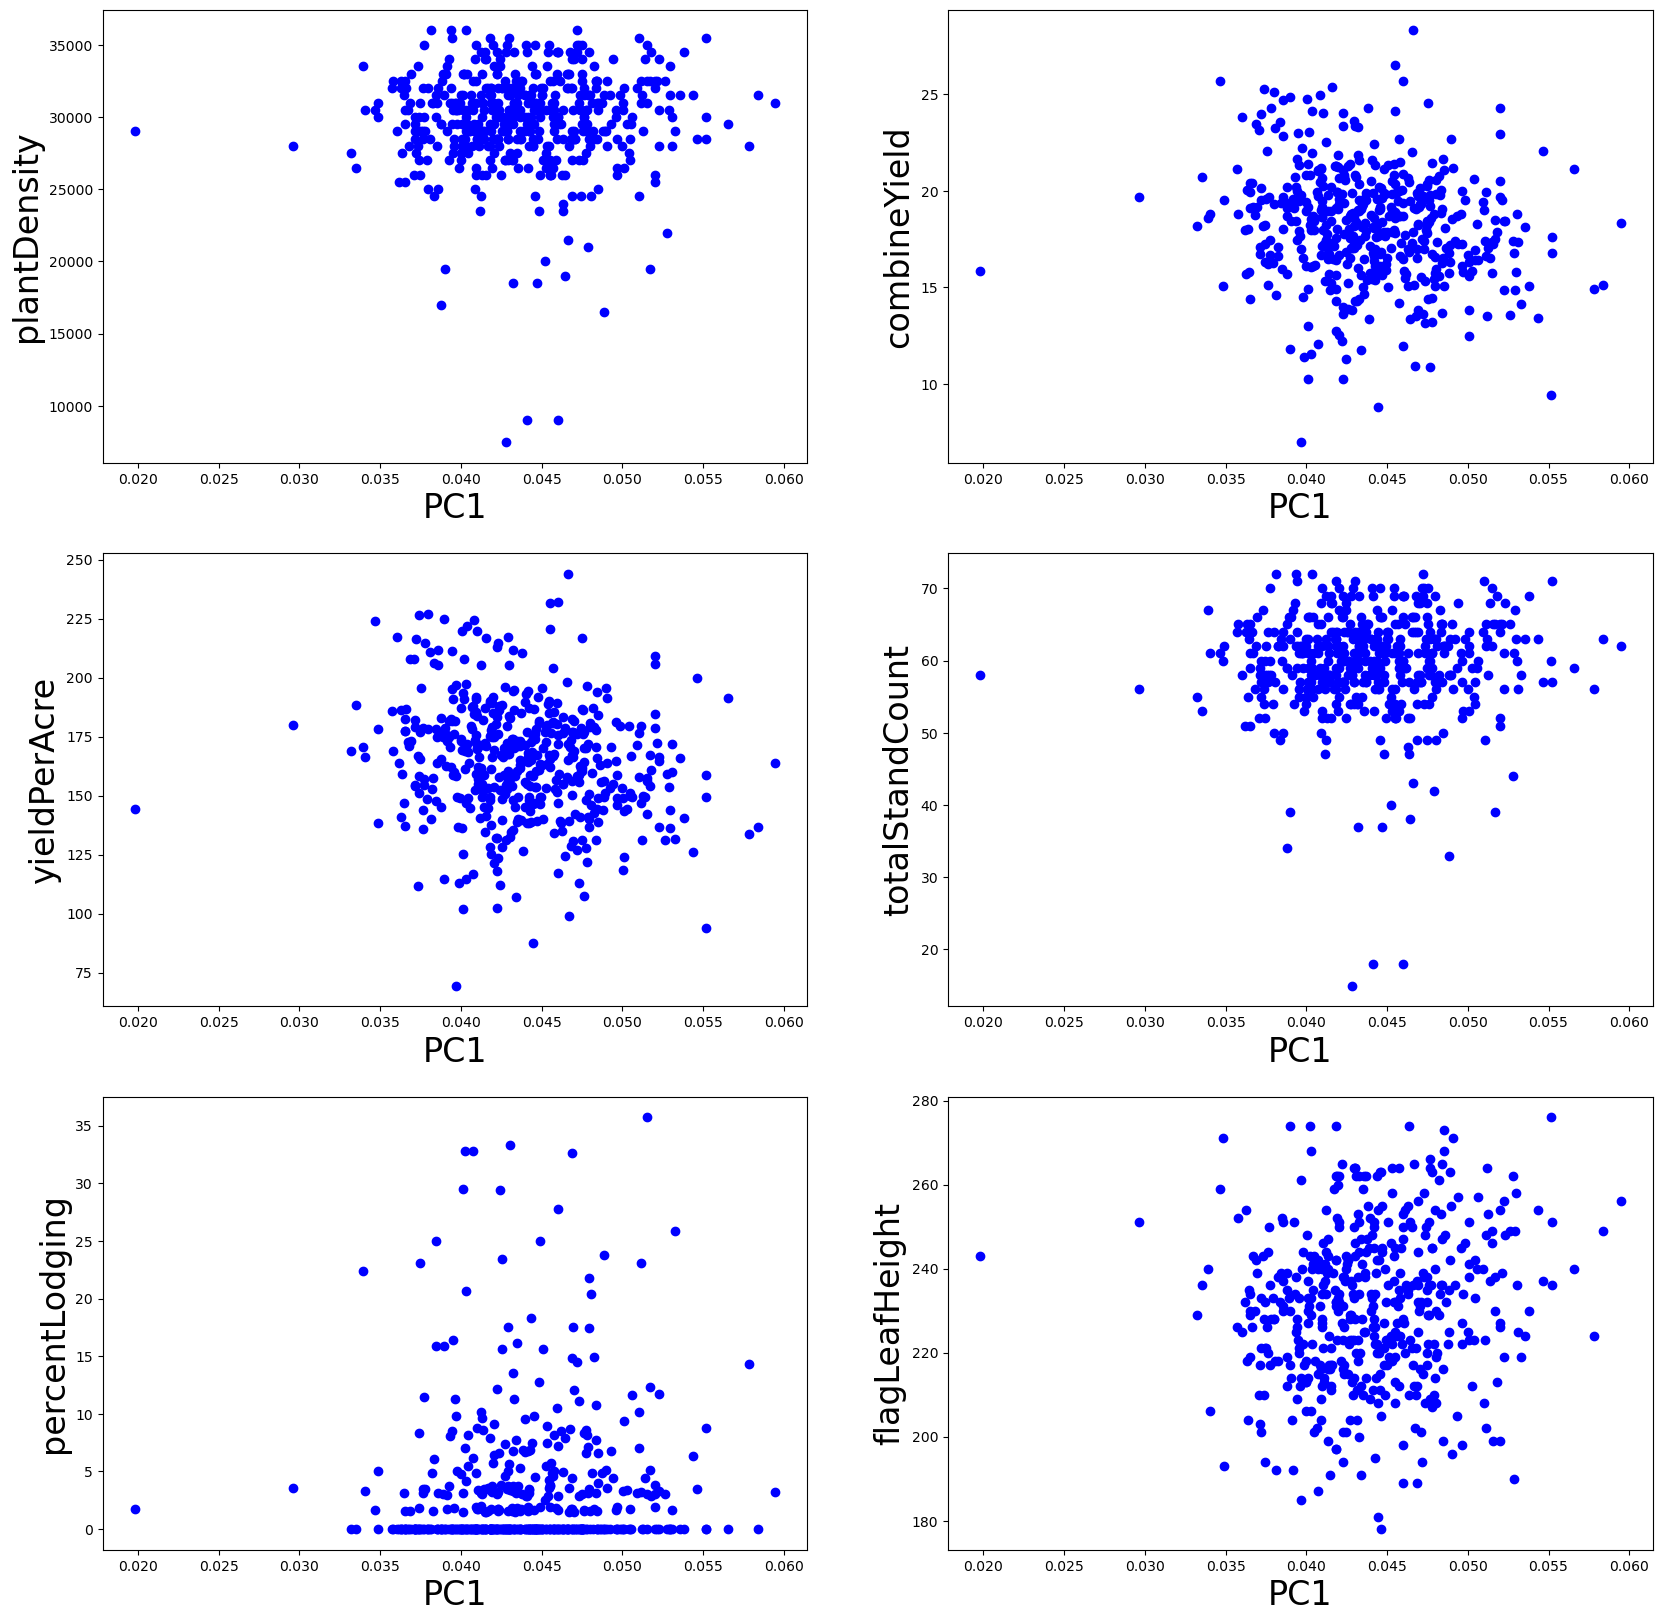

In [328]:
new_column_names=RGBvalues.columns[[10,11,12,13,24,25,4]]
print(len(new_column_names))
fig = plt.figure(figsize=(20,20))

num=1
for i in new_column_names:
    myax=fig.add_subplot(3,2,num)
    RGBvalues_plotting=RGBvalues[['PC1', i]]
    myax.scatter(RGBvalues_plotting['PC1'], RGBvalues_plotting[i], color='blue', alpha=1)
    myax.set_xlabel("PC1",fontsize=24)
    myax.set_ylabel(i, fontsize=24)
    
#     plt.xlim(24900,25000)
#     plt.title(str(i))
    if num==6: break
    num+=1
plt.savefig("../NNSatelliteImages/Data/PC1_"+TP+"_Crawfordsville.png")

7


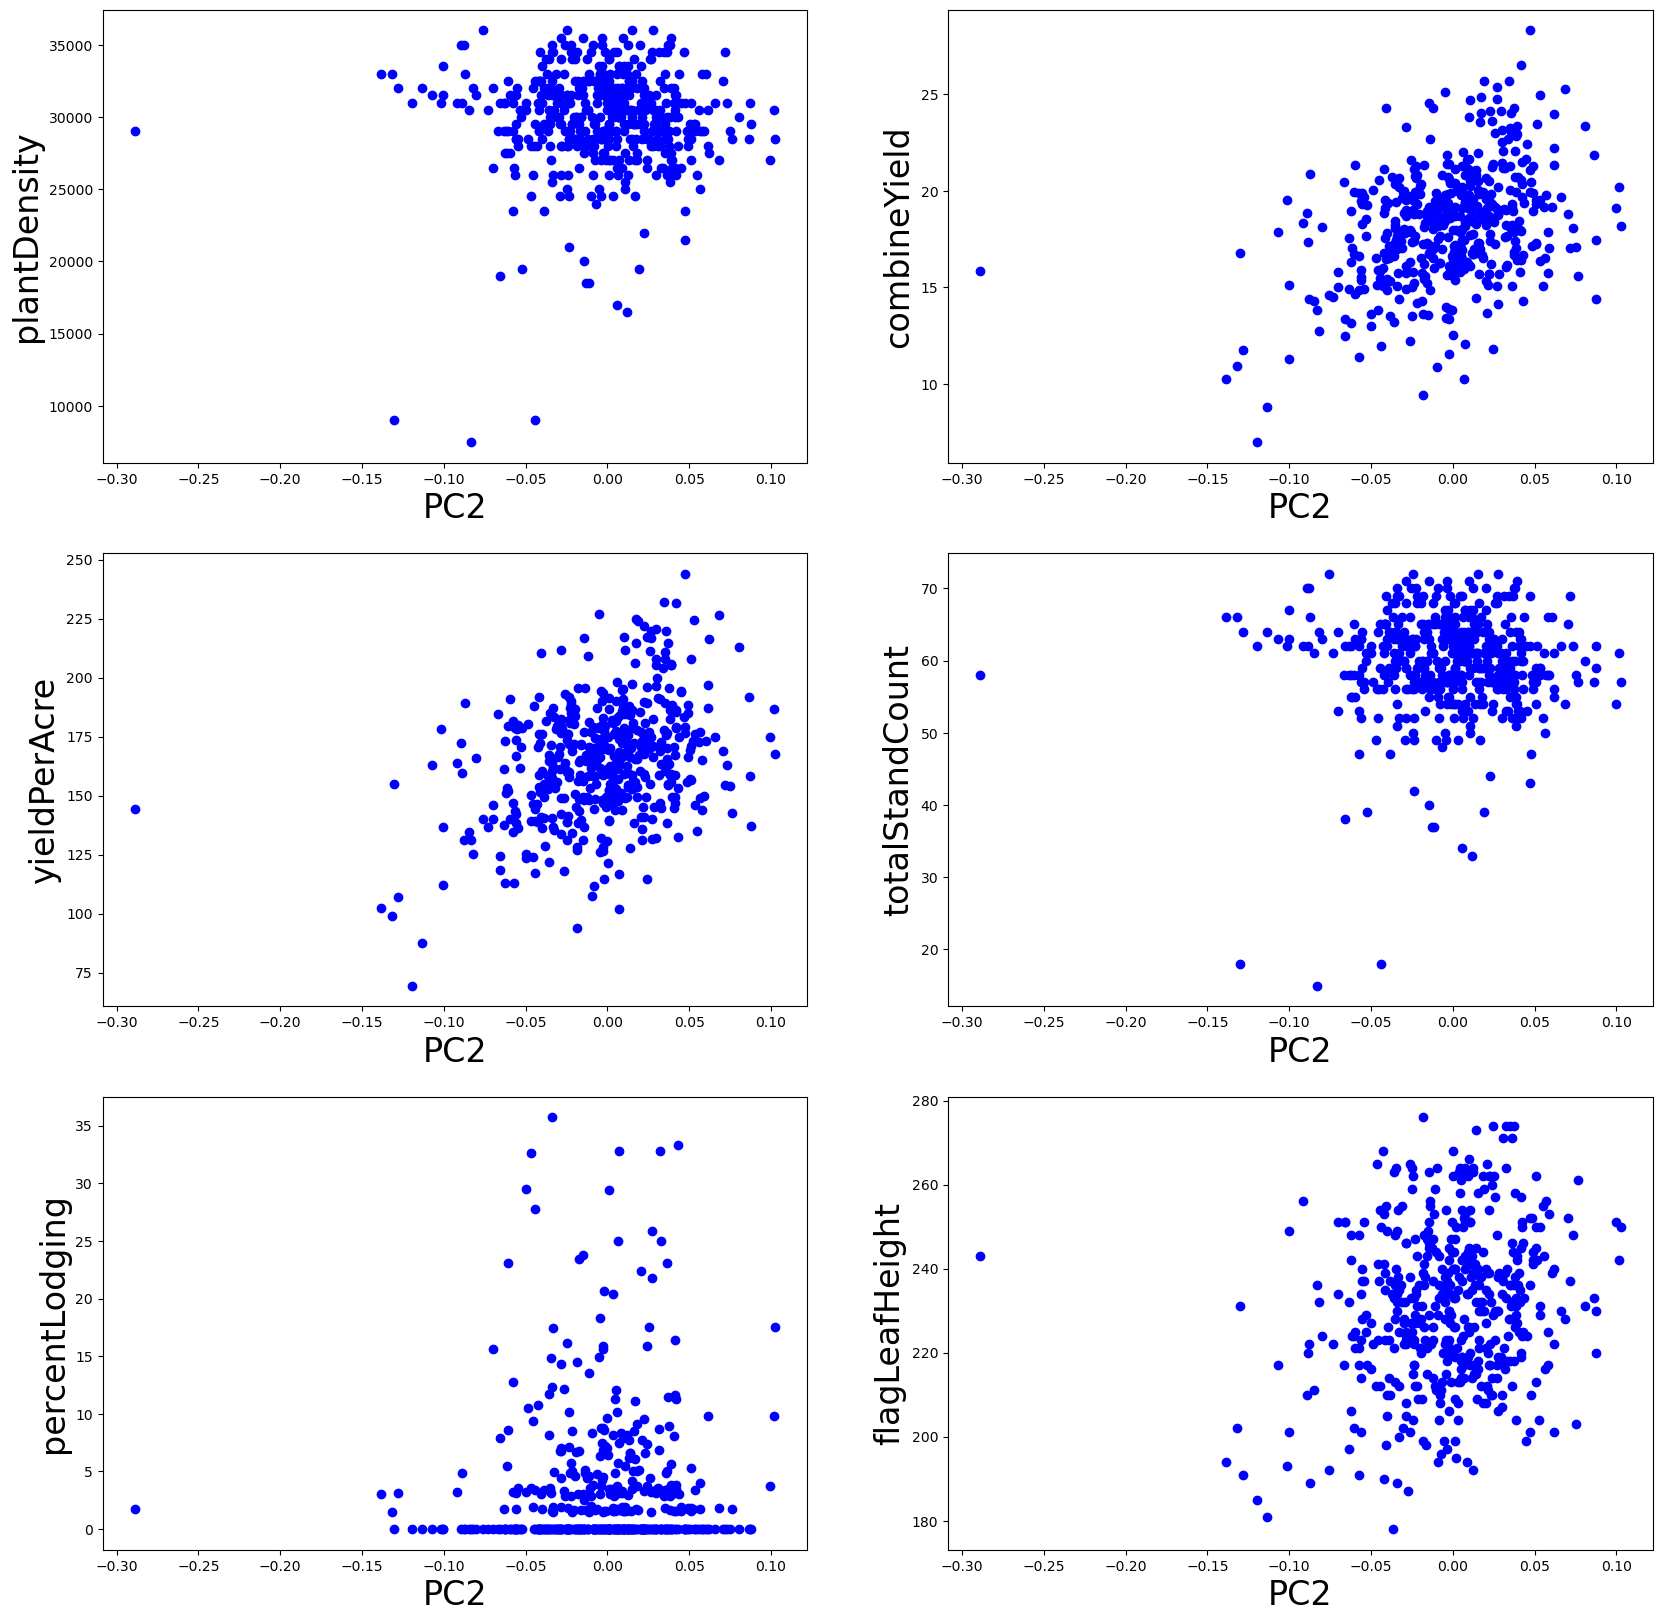

In [329]:
new_column_names=RGBvalues.columns[[10,11,12,13,24,25,5]]
print(len(new_column_names))
fig = plt.figure(figsize=(20,20))

num=1
for i in new_column_names:
    myax=fig.add_subplot(3,2,num)
    RGBvalues_plotting=RGBvalues[['PC2', i]]
    myax.scatter(RGBvalues_plotting['PC2'], RGBvalues_plotting[i], color='blue', alpha=1)
    myax.set_xlabel("PC2",fontsize=24)
    myax.set_ylabel(i, fontsize=24)
    
#     plt.xlim(24900,25000)
#     plt.title(str(i))
    if num==6: break
    num+=1
plt.savefig("../NNSatelliteImages/Data/PC2_"+TP+"_Crawfordsville.png")

7


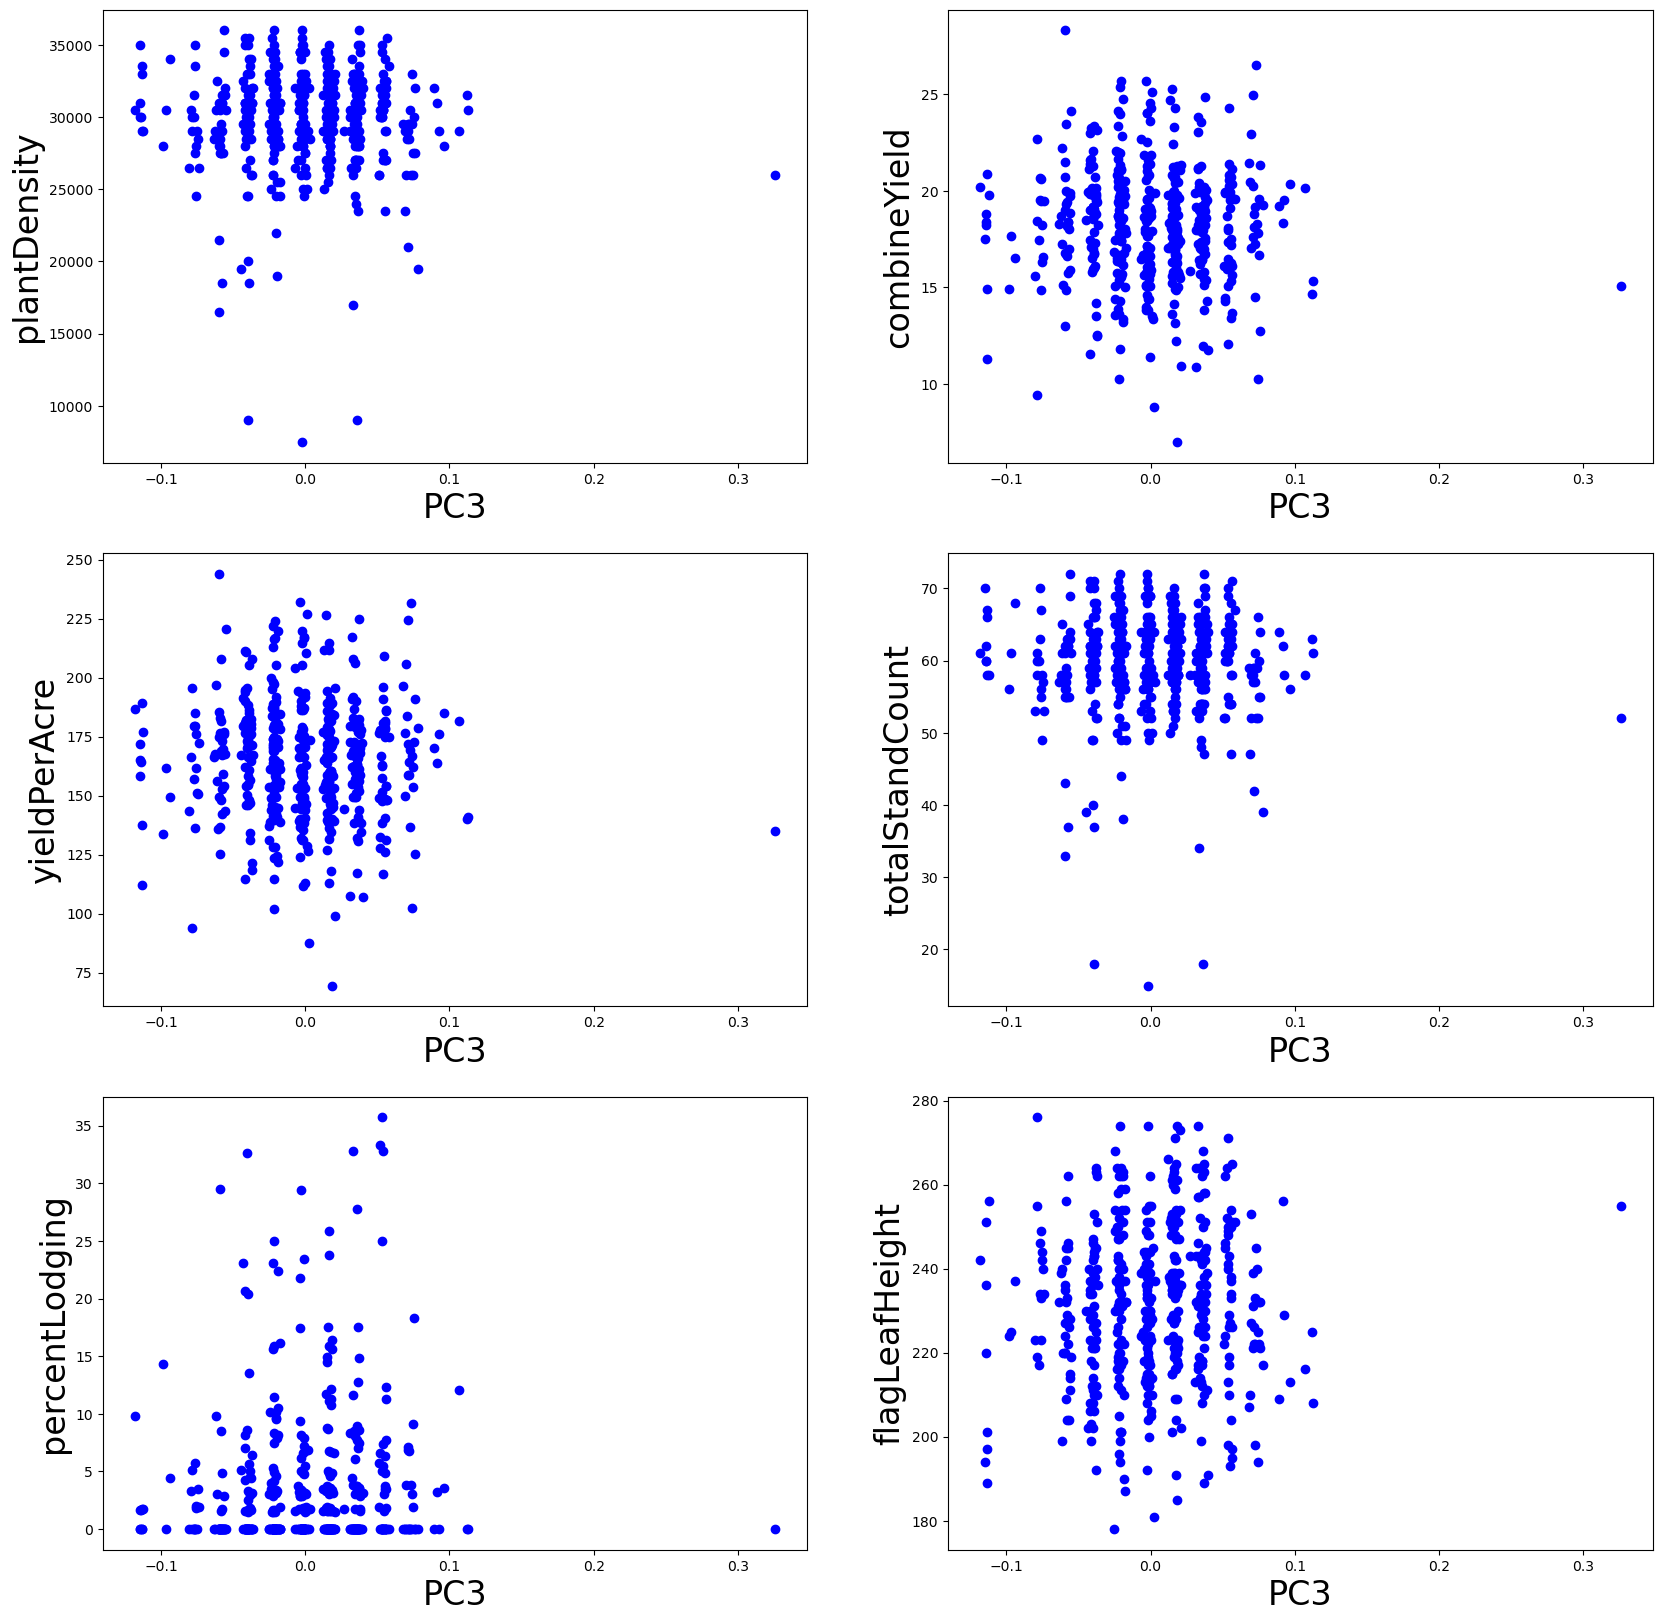

In [330]:
new_column_names=RGBvalues.columns[[10,11,12,13,24,25,6]]
print(len(new_column_names))
fig = plt.figure(figsize=(20,20))

num=1
for i in new_column_names:
    myax=fig.add_subplot(3,2,num)
    RGBvalues_plotting=RGBvalues[['PC3', i]]
    myax.scatter(RGBvalues_plotting['PC3'], RGBvalues_plotting[i], color='blue', alpha=1)
    myax.set_xlabel("PC3",fontsize=24)
    myax.set_ylabel(i, fontsize=24)
    
#     plt.xlim(24900,25000)
#     plt.title(str(i))
    if num==6: break
    num+=1
plt.savefig("../NNSatelliteImages/Data/PC3_TP2_Crawfordsville.png")

In [287]:
RGBvalues.columns

Index(['file', 'Red', 'Green', 'Blue', 'field', 'range', 'row', 'plantDensity',
       'combineYield', 'yieldPerAcre', 'totalStandCount', 'daysToAnthesis',
       'GDDToAnthesis', 'daysToSilk', 'GDDToSilk', 'percentMoisture',
       'percentStarch', 'percentProtein', 'percentOil', 'percentFiber',
       'percentAsh', 'percentLodging', 'flagLeafHeight', 'PC1', 'PC2', 'PC3'],
      dtype='object')

In [253]:
new_column_names

Index(['plantDensity', 'combineYield', 'yieldPerAcre', 'totalStandCount',
       'percentLodging', 'flagLeafHeight', 'Blue'],
      dtype='object')

In [331]:
RGBvalues.to_csv("../NNSatelliteImages/Data/HipsData_TP1_CrawFordsville.csv", index=False)

In [284]:
##New Images indices

In [139]:
path = "/home/schnablelab/Documents/ImageDataset/RGB_satellite/Crawfordsville/Hybrids/TP2/"
TP="TP2"
print(path) 
def RGB(path):
    all_files=glob.glob(os.path.join(path, '*.PNG'))
    Color=[]
    for files in all_files:
        print
        img=cv.imread(files)
        img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
        R=[]
        G=[]
        B=[]
        h=img.shape[0]
        w=img.shape[1]
        Image=os.path.basename(files).split('.')[0]
        for height in range(h):
            # print(height)
            for width in range(w):
                # print(height, width)
                r,g,b = img[height, width]
                GLI=(2*g-r-b)/(2*g+r+b)
                NGRDI=(g-r)/(g+r)
            

                Color.append(
                    {'file':Image,
                     'Red':r,
                     'Green':g,
                     'Blue':b,
                     'GLI':GLI,
                     'NGRDI':NGRDI
                    }
                )
    RGB_values=pd.DataFrame(Color)
    return RGB_values

/home/schnablelab/Documents/ImageDataset/RGB_satellite/Crawfordsville/Hybrids/TP2/


In [140]:
RGBvalues_satellite=RGB(path)

/tmp/ipykernel_44023/3618139862.py:26: RuntimeWarning: invalid value encountered in scalar divide
  GLI=(2*g-r-b)/(2*g+r+b)
/tmp/ipykernel_44023/3618139862.py:27: RuntimeWarning: invalid value encountered in scalar divide
  NGRDI=(g-r)/(g+r)
/tmp/ipykernel_44023/3618139862.py:27: RuntimeWarning: overflow encountered in scalar add
  NGRDI=(g-r)/(g+r)
/tmp/ipykernel_44023/3618139862.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  NGRDI=(g-r)/(g+r)
/tmp/ipykernel_44023/3618139862.py:27: RuntimeWarning: overflow encountered in scalar subtract
  NGRDI=(g-r)/(g+r)


(array([ 15.,  26.,  47.,  81.,  72., 153.,  92.,  28.,   4.,   4.]),
 array([ 73. ,  75.8,  78.6,  81.4,  84.2,  87. ,  89.8,  92.6,  95.4,
         98.2, 101. ]),
 <BarContainer object of 10 artists>)

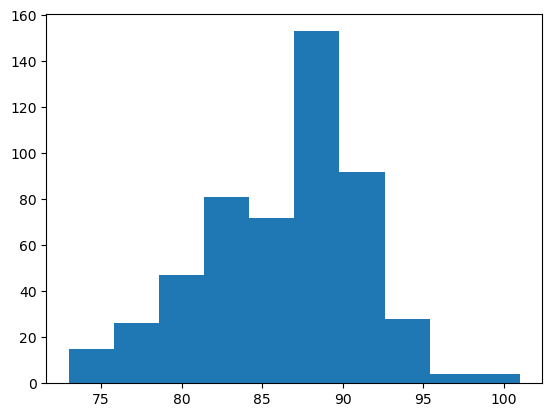

In [190]:
plt.hist(df1['GreenMedian'], bins=10)

In [149]:
RGBvalues_satellite=RGBvalues_satellite.loc[RGBvalues_satellite['Red']>=0.001]
# RGBvalues_satellite["NGRDI"]=(RGBvalues_satellite['Green']-RGBvalues_satellite['Red'])/(RGBvalues_satellite['Green']+RGBvalues_satellite['Red'])
# RGBvalues_satellite['GLIupper']=(2*RGBvalues_satellite["Green"]-RGBvalues_satellite["Red"]-RGBvalues_satellite["Blue"])
# RGBvalues_satellite['GLIlower']=(2*RGBvalues_satellite["Green"]+RGBvalues_satellite["Red"]+RGBvalues_satellite["Blue"])

In [60]:
RGBvalues_satellite['GLI']=RGBvalues_satellite['GLIupper']/RGBvalues_satellite['GLIlower']

In [132]:
RGBvalues_satellite.to_csv("RGBvalue_satellite_zeros.csv", index=False)

In [127]:
RGBvalues_satellite.describe()

,Red,Green,Blue,GLI,NGRDI
count,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000
mean,67.079639,83.553491,71.557738,0.101769,0.127520
std,18.763291,14.070162,13.514289,0.052812,0.101202
min,1.000000,19.000000,12.000000,0.019780,0.008696
25%,56.000000,75.000000,64.000000,0.071859,0.074830
50%,68.000000,84.000000,73.000000,0.089855,0.103896
75%,80.000000,93.000000,80.000000,0.116608,0.148936
max,115.000000,122.000000,109.000000,0.565217,0.957447


In [142]:
RGBvalues_satellite

,file,Red,Green,Blue,GLI,NGRDI
0,Crawfordsville-TP2-4353_36_44,0,0,0,NaN,NaN
1,Crawfordsville-TP2-4353_36_44,65,81,71,0.087248,0.109589
2,Crawfordsville-TP2-4353_36_44,81,93,82,0.065903,0.068966
3,Crawfordsville-TP2-4353_36_44,69,84,73,0.083871,0.098039
4,Crawfordsville-TP2-4353_36_44,77,88,79,0.060241,0.066667
...,...,...,...,...,...,...
128349,Crawfordsville-TP2-4352_15_6,0,0,0,NaN,NaN
128350,Crawfordsville-TP2-4352_15_6,0,0,0,NaN,NaN
128351,Crawfordsville-TP2-4352_15_6,0,0,0,NaN,NaN
128352,Crawfordsville-TP2-4352_15_6,0,0,0,NaN,NaN


In [156]:
df1=RGBvalues_satellite.groupby('file')[["Red", "Green", "Blue", 'GLI', 'NGRDI']].agg(['mean', 'median', 'sum']).reset_index()
df1

file        Red                    Green         \
                                         mean median    sum       mean median   
0    Crawfordsville-TP2-4351_10_13  70.180095   71.0  14808  83.985782   84.0   
1    Crawfordsville-TP2-4351_10_14  63.575000   65.0  12715  79.385000   81.0   
2    Crawfordsville-TP2-4351_10_15  69.840000   71.0  13968  82.010000   82.0   
3    Crawfordsville-TP2-4351_10_16  66.149533   69.0  14156  81.088785   84.0   
4    Crawfordsville-TP2-4351_10_17  66.144231   70.0  13758  83.024038   85.0   
..                             ...        ...    ...    ...        ...    ...   
517   Crawfordsville-TP2-4353_9_42  78.065728   81.0  16628  96.896714  100.0   
518   Crawfordsville-TP2-4353_9_43  72.732719   74.0  15783  88.838710   90.0   
519   Crawfordsville-TP2-4353_9_44  72.735294   77.0  14838  89.318627   91.0   
520   Crawfordsville-TP2-4353_9_45  72.285000   72.0  14457  88.520000   88.0   
521   Crawfordsville-TP2-4353_9_46  60.278607   63.0  12116  75.895522   78.0   

                 Blue                     GLI                          NGRDI  \
       sum       mean median    sum      mean    median        sum      mean   
0    17721  73.123223   73.0  15429  0.084317  0.077364  17.790875  0.099954   
1    15877  68.615000   70.0  13723  0.095420  0.089606  19.084090  0.120160   
2    16402  73.235000   74.0  14647  0.073131  0.065789  14.626205  0.091265   
3    17353  71.579439   74.0  15318  0.086727  0.079156  18.559498  0.112948   
4    17269  70.105769   73.0  14582  0.108397  0.090909  22.546564  0.132753   
..     ...        ...    ...    ...       ...       ...        ...       ...   
517  20639  79.051643   82.0  16838  0.118235  0.097436  25.184147  0.133263   
518  19278  75.718894   77.0  16431  0.098158  0.086835  21.300316  0.116560   
519  18221  75.328431   78.0  15367  0.101771  0.087719  20.761284  0.119284   
520  17704  74.630000   74.0  14926  0.095946  0.093725  19.189278  0.106337   
521  15255  65.945274   68.0  13255  0.100195  0.084337  20.139188  0.133177   

                          
       median        sum  
0    0.087719  21.090288  
1    0.104545  24.032033  
2    0.074987  18.253099  
3    0.096226  24.170931  
4    0.101266  27.612721  
..        ...        ...  
517  0.097826  28.384979  
518  0.096386  25.293451  
519  0.093023  24.333965  
520  0.100000  21.267329  
521  0.101449  26.768572  

[522 rows x 16 columns]

In [159]:
df1.columns=[['file','RedMean', 'RedMedian', 'RedSum','GreenMean','GreenMedian', 'GreenSum', 'BlueMean', 'BlueMedian', 'BlueSum', 'GLIMean', 'GLIMedian', 'GLIsum', 'NGRDIMean', 'NGRDIMedian', 'NGRDISum']]

In [173]:
df1.describe()

,RedMean,RedMedian,RedSum,GreenMean,GreenMedian,GreenSum,BlueMean,BlueMedian,BlueSum,GLIMean,GLIMedian,GLIsum,NGRDIMean,NGRDIMedian,NGRDISum
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,521.000000,522.000000,521.000000
mean,68.959584,70.733716,14246.114943,84.770320,85.950192,17513.245211,72.842392,73.951149,15049.093870,0.096135,0.086011,19.866742,0.126372,0.097710,26.129006
std,4.218348,4.443932,954.521772,4.433686,4.683086,1048.573786,3.131263,3.264273,784.135208,0.009499,0.008456,2.108287,0.100757,0.010479,21.053191
min,57.450000,59.000000,11490.000000,71.250000,73.000000,14250.000000,64.305000,65.000000,12861.000000,0.051876,0.043478,10.738385,0.083451,0.062500,16.815959
25%,66.635457,68.000000,13662.250000,82.167188,84.000000,16864.250000,71.071751,73.000000,14566.000000,0.090313,0.080745,18.420318,0.108970,0.090909,22.338137
50%,69.329910,71.000000,14248.000000,85.287962,87.000000,17583.500000,73.160833,74.000000,15037.500000,0.096254,0.086758,19.733880,0.118106,0.098039,24.354953
75%,71.606167,74.000000,14894.750000,87.779407,89.000000,18244.750000,74.880080,76.000000,15606.750000,0.101782,0.090909,21.239433,0.127479,0.105263,26.387523
max,82.120000,84.000000,17885.000000,100.105000,101.000000,21883.000000,83.650000,83.000000,18140.000000,0.126806,0.111466,26.629313,2.087161,0.127517,438.303744


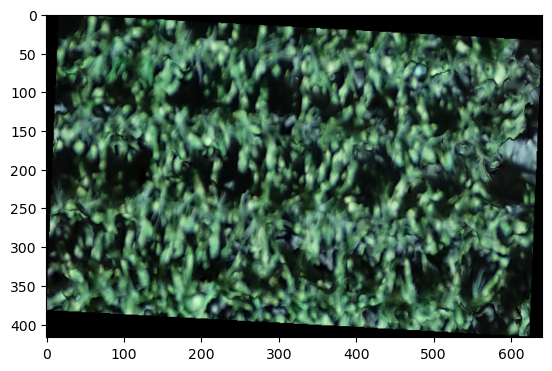

In [15]:
RGBvalues_uav=RGB("/home/schnablelab/Documents/ImageDataset/RGB_UAV/MOValley/Hybrids/TP2/")

(array([56., 45., 44., 85., 37., 38., 39., 23., 27., 12.]),
 array([ 14. ,  36.1,  58.2,  80.3, 102.4, 124.5, 146.6, 168.7, 190.8,
        212.9, 235. ]),
 <BarContainer object of 10 artists>)

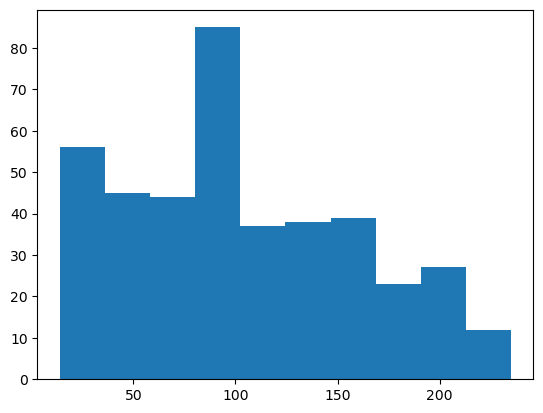

In [26]:
plt.hist(RGBvalues_uav['Green'])

In [25]:
RGBvalues_uav=RGBvalues_uav.loc[RGBvalues_uav['Red']>=10]